In [657]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np 
import cartopy.crs as ccrs
import cmocean 
import pandas as pd
import cftime
import matplotlib.path as mpath
import nc_time_axis
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter
import datetime
import dask

In [658]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 
plt.style.use("dark_background") 

In [659]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'

In [660]:
heat_content_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/heat_content_anomaly_0-2000_yearly.nc'
heat_content_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/heat_content_anomaly_0-700_yearly.nc'
halosteric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-2000_yearly.nc'
halosteric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-700_yearly.nc'
thermosteric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-2000_yearly.nc'
thermosteric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-700_yearly.nc'
steric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-2000_yearly.nc'
steric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-700_yearly.nc'


In [661]:
heat_content_0_2000 = xr.open_dataset(heat_content_0_2000_path, decode_times=False)
heat_content_0_700 = xr.open_dataset(heat_content_0_700_path, decode_times=False)
halosteric_sea_level_0_2000 = xr.open_dataset(halosteric_sea_level_0_2000_path, decode_times=False)
halosteric_sea_level_0_700 = xr.open_dataset(halosteric_sea_level_0_700_path, decode_times=False)
thermosteric_sea_level_0_2000 = xr.open_dataset(thermosteric_sea_level_0_2000_path, decode_times=False)
thermosteric_sea_level_0_700 = xr.open_dataset(thermosteric_sea_level_0_700_path, decode_times=False)
steric_sea_level_0_2000 = xr.open_dataset(steric_sea_level_0_2000_path, decode_times=False)
steric_sea_level_0_700 = xr.open_dataset(steric_sea_level_0_700_path, decode_times=False)


In [662]:
heat_content_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [663]:
time_0_2000 = heat_content_0_2000['time'].values
base_year = 2005
time_as_years_0_2000 = base_year + (time_0_2000 / 12) -50.5
print(time_as_years_0_2000[:18])

[2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.]


In [664]:
heat_content_2000_global = heat_content_0_2000['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
time_years = np.floor(heat_content_0_2000['time'].values).astype(int) 
trend_2000_slope = (heat_content_2000_global[-1] - heat_content_2000_global[0]) / (time_years[-1] - time_years[0])
print(f"Trend 0-2000m (Global): {trend_2000_slope:.2f} units/year")

Trend 0-2000m (Global): 0.02 units/year


In [665]:
regions = {
    'Northern Hemisphere': 'yearl_h22_NH',
    'Southern Hemisphere': 'yearl_h22_SH',
    'Atlantic Ocean': 'yearl_h22_AO',
    'Pacific Ocean': 'yearl_h22_PO',
    'Indian Ocean': 'yearl_h22_IO'
}

Northern Hemisphere Trend: 0.03 units/year
Southern Hemisphere Trend: 0.06 units/year
Atlantic Ocean Trend: 0.03 units/year
Pacific Ocean Trend: 0.03 units/year
Indian Ocean Trend: 0.02 units/year


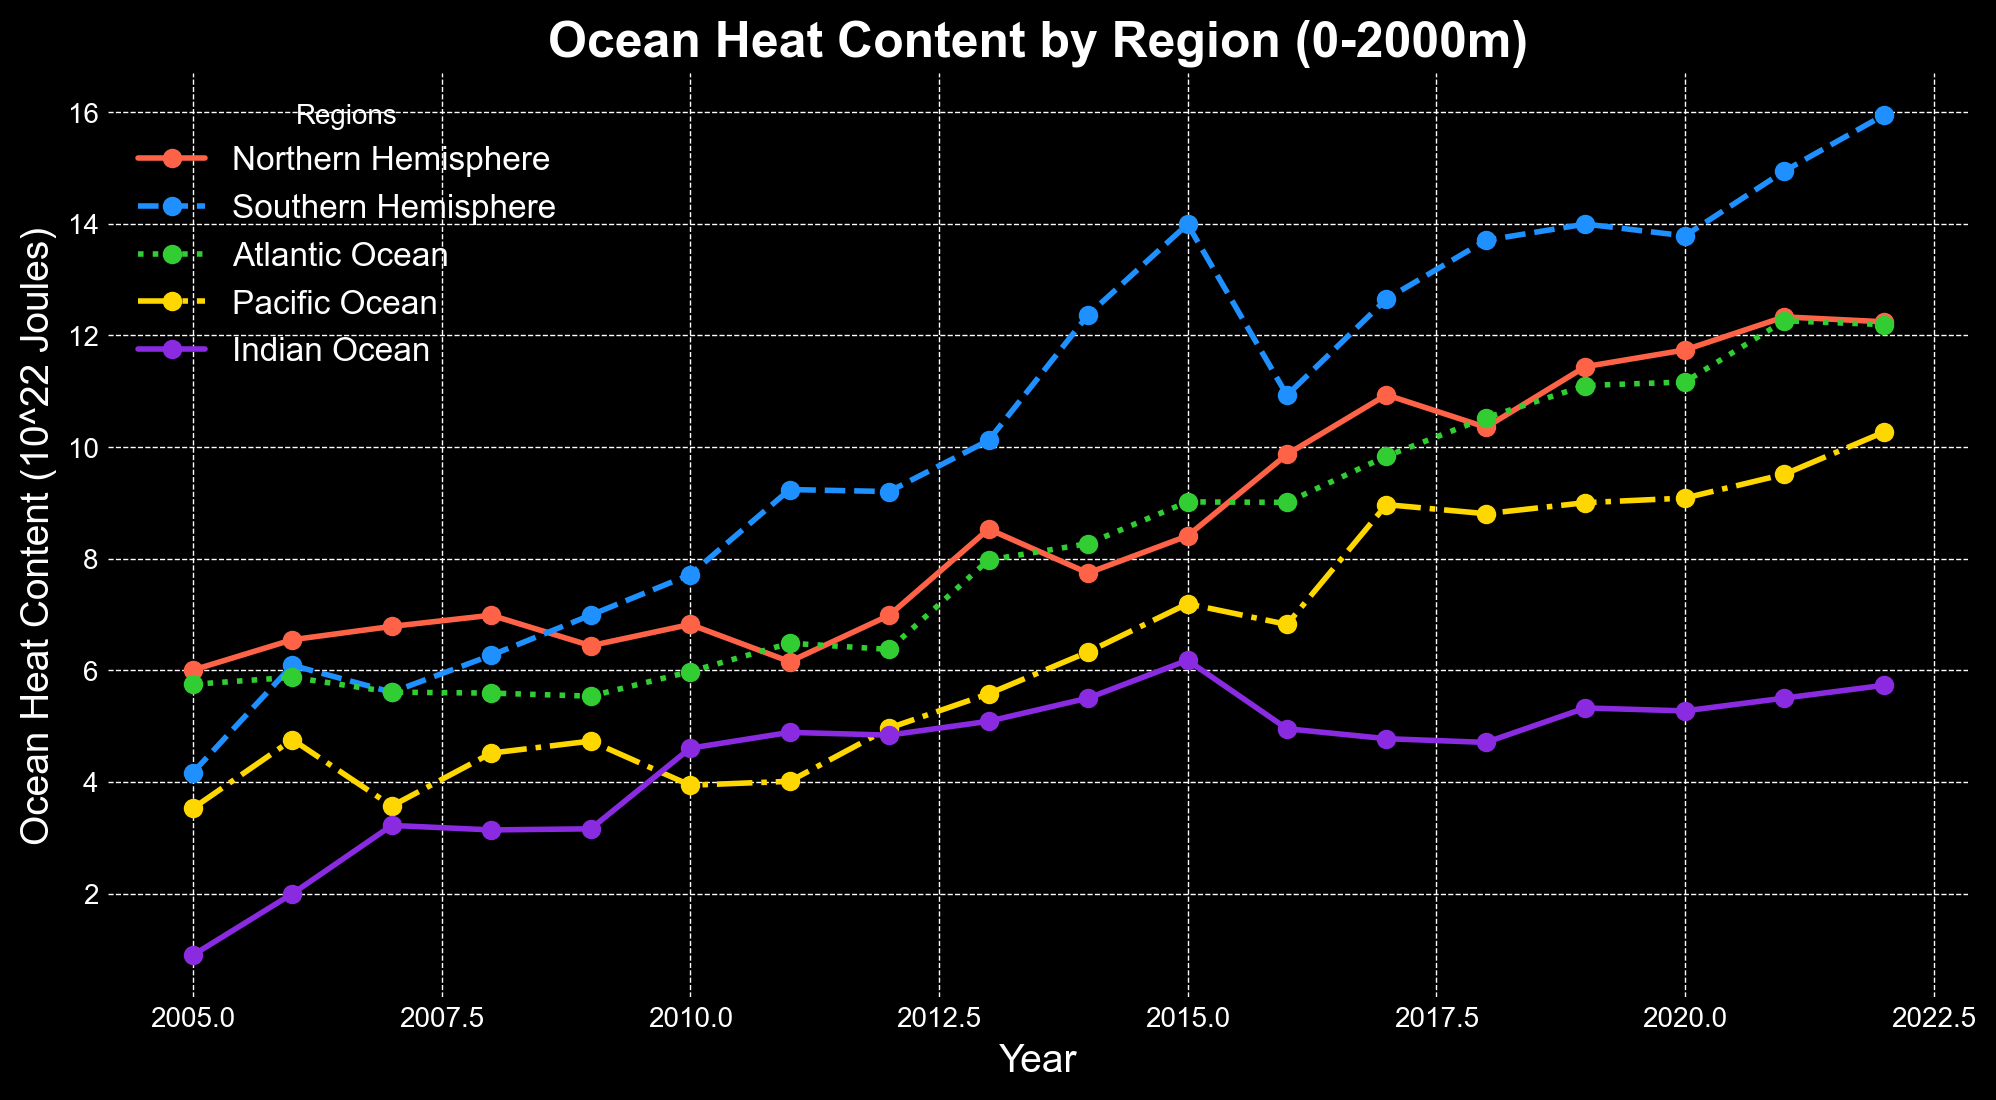

In [666]:
plt.figure(figsize=(12, 6))

colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700', '#8A2BE2'] 
linestyles = ['-', '--', ':', '-.', '-']  

# Iterate through regions with new styles
for i, (region, var) in enumerate(regions.items()):
    regional_data = heat_content_0_2000[var].values
    plt.plot(time_as_years_0_2000, regional_data, label=region, 
             color=colors[i], linestyle=linestyles[i], linewidth=2, marker='o', markersize=6)

    regional_trend = (regional_data[-1] - regional_data[0]) / (time_years[-1] - time_years[0])
    print(f"{region} Trend: {regional_trend:.2f} units/year")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Ocean Heat Content (10^22 Joules)", fontsize=14)
plt.title("Ocean Heat Content by Region (0-2000m)", fontsize=18, fontweight='bold')

# Customize grid for better contrast
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust legend position and font size
plt.legend(loc='upper left', fontsize=12, title="Regions")

# Display the graph
plt.show()

In [667]:
heat_content_avg = heat_content_0_2000['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
time_as_years = 1955 + (heat_content_0_2000['time'] / 12) 
heat_content_avg_values = heat_content_avg.values

In [668]:
heat_content_0_2000_var = heat_content_0_2000['h18_hc']

In [669]:
heat_content_0_2000_var

<xarray.DataArray 'h18_hc' (time: 18, depth: 1, lat: 180, lon: 360)>
array([[[[      nan, ...,       nan],
         ...,
         [-0.00172 , ..., -0.001826]]],


       ...,


       [[[      nan, ...,       nan],
         ...,
         [ 0.136631, ...,  0.131358]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) float32 606.0 618.0 630.0 642.0 ... 774.0 786.0 798.0 810.0
Dimensions without coordinates: depth
Attributes:
    long_name:     Ocean heat content anomaly calculated from objectively ana...
    coordinates:   time lat lon depth
    cell_methods:  area: mean depth: mean time: mean
    grid_mapping:  crs
    units:         10^18_joules

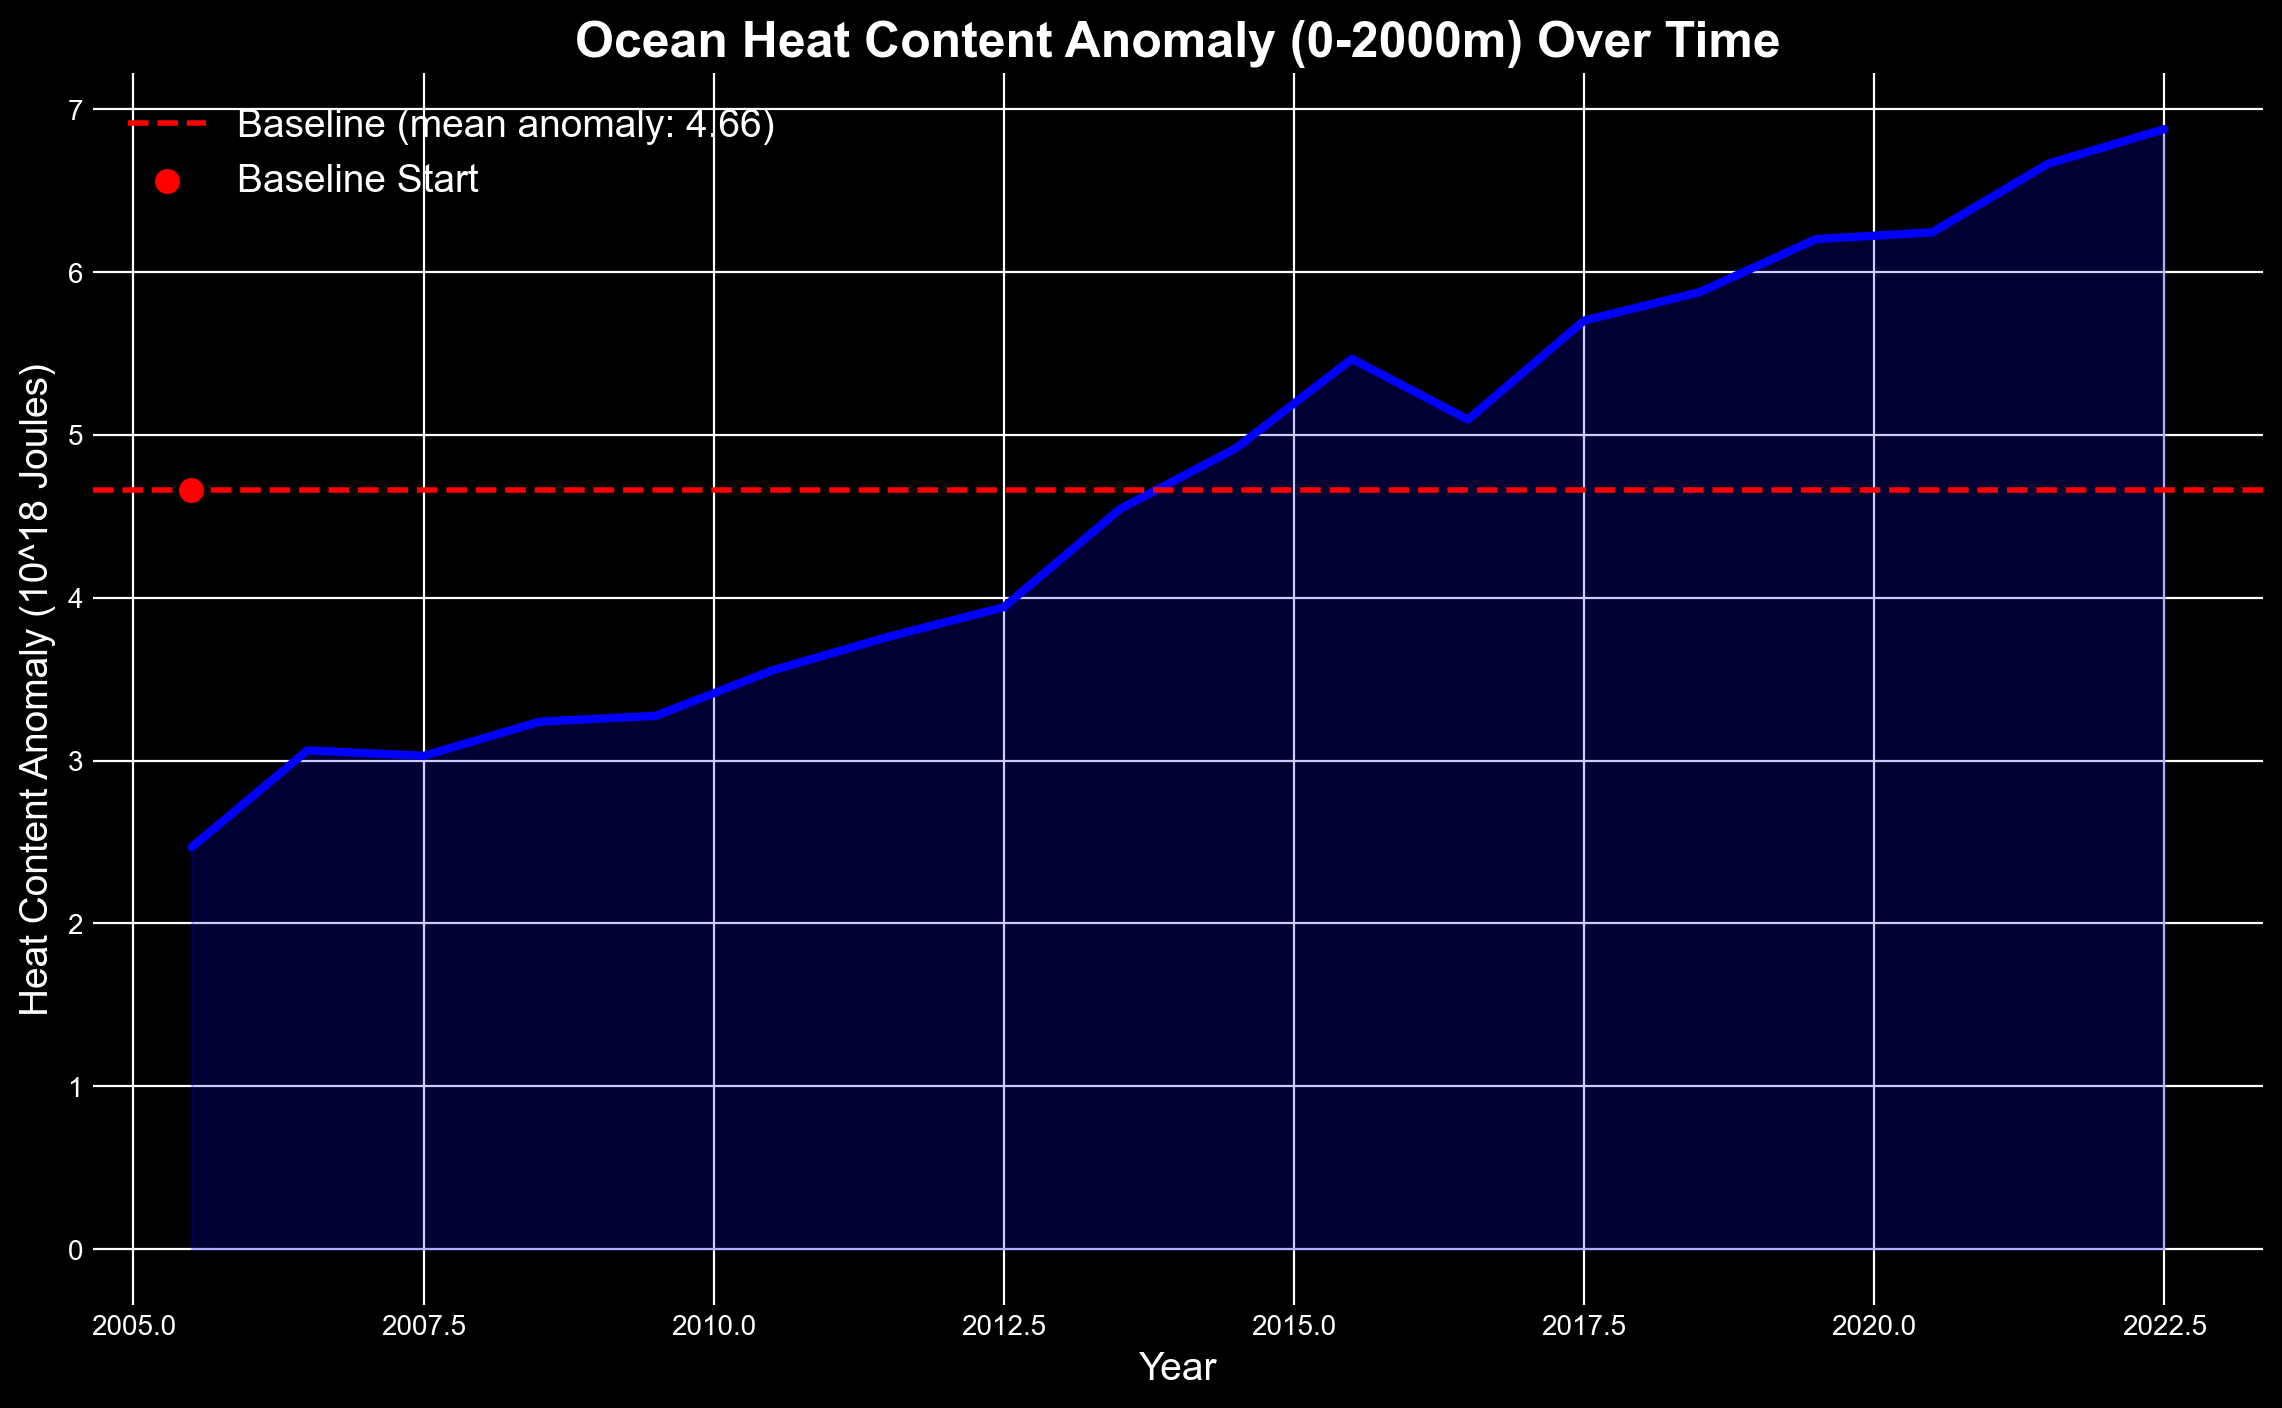

In [670]:
plt.figure(figsize=(14, 8))
plt.plot(time_as_years, heat_content_avg_values, color='blue', linewidth=3)
plt.fill_between(time_as_years, heat_content_avg_values, color='blue', alpha=0.2)  
baseline_value = np.mean(heat_content_avg_values)  
plt.axhline(y=baseline_value, color='red', linestyle='--', linewidth=2, label=f'Baseline (mean anomaly: {baseline_value:.2f})')
plt.scatter(time_as_years[0], baseline_value, color='red', zorder=5, s=100, edgecolor='black', label='Baseline Start', marker='o')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Heat Content Anomaly (10^18 Joules)", fontsize=14)
plt.title("Ocean Heat Content Anomaly (0-2000m) Over Time", fontsize=18, fontweight='bold')
plt.grid(True)
plt.legend(loc="upper left", fontsize=14)
plt.show()

#### Figure 1: Ocean Heat Content Anomaly (0-2000m) Over Time (2005–2022)
The anomaly in ocean heat content from the surface to a depth of 2000 meters over the course of 18 years. The heat content anomaly is the deviation from the long-term mean (baseline), with positive anomalies indicating an increase in ocean heat storage and negative anomalies indicating a decrease. The red dashed line represents the baseline (mean heat content anomaly) over the entire period. These anomalies are a key indicator of the global heat imbalance, reflecting changes in oceanic thermal energy due to climate change and variability.

In [671]:
heat_content_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [672]:
print(heat_content_0_700)

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) 

In [673]:
time_0_700 = heat_content_0_700['time'].values
base_year = 1955
time_as_years_0_700 = base_year + (time_0_700 / 12)
print(time_as_years_0_700[:68]) 

[1955.5 1956.5 1957.5 1958.5 1959.5 1960.5 1961.5 1962.5 1963.5 1964.5
 1965.5 1966.5 1967.5 1968.5 1969.5 1970.5 1971.5 1972.5 1973.5 1974.5
 1975.5 1976.5 1977.5 1978.5 1979.5 1980.5 1981.5 1982.5 1983.5 1984.5
 1985.5 1986.5 1987.5 1988.5 1989.5 1990.5 1991.5 1992.5 1993.5 1994.5
 1995.5 1996.5 1997.5 1998.5 1999.5 2000.5 2001.5 2002.5 2003.5 2004.5
 2005.5 2006.5 2007.5 2008.5 2009.5 2010.5 2011.5 2012.5 2013.5 2014.5
 2015.5 2016.5 2017.5 2018.5 2019.5 2020.5 2021.5 2022.5]


In [674]:
time_as_years_0_700_rounded = np.round(time_as_years_0_700).astype(int)
print(time_as_years_0_700_rounded[:68]) 

[1956 1956 1958 1958 1960 1960 1962 1962 1964 1964 1966 1966 1968 1968
 1970 1970 1972 1972 1974 1974 1976 1976 1978 1978 1980 1980 1982 1982
 1984 1984 1986 1986 1988 1988 1990 1990 1992 1992 1994 1994 1996 1996
 1998 1998 2000 2000 2002 2002 2004 2004 2006 2006 2008 2008 2010 2010
 2012 2012 2014 2014 2016 2016 2018 2018 2020 2020 2022 2022]


In [675]:
heat_content_0_700_avg = heat_content_0_700['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
print(heat_content_0_700_avg)

<xarray.DataArray 'h18_hc' (time: 68)>
array([-0.76616794, -0.63232714, -1.1165941 , -0.37482622, -0.52979213,
       -0.3440252 , -0.49823382, -0.24856934, -0.5434177 , -0.74478287,
       -0.73633665, -0.94185793, -1.0409926 , -1.3869675 , -1.0858189 ,
       -1.2801622 , -0.9049408 , -1.2637564 , -0.8522976 , -0.6736094 ,
       -0.37444544, -0.6376426 ,  0.01535239,  0.0179543 , -0.22770451,
        0.26261404,  0.01996759, -0.567376  , -0.6834087 , -0.12407199,
        0.01299194, -0.25611666, -0.23272423,  0.25829783,  0.21756558,
        0.05229003,  0.64160866,  0.12332966,  0.1399194 ,  0.35853496,
        0.5378178 ,  1.0876495 ,  0.78283215,  1.0450587 ,  1.4363087 ,
        1.3752041 ,  1.0183694 ,  1.656906  ,  2.4101348 ,  2.4817638 ,
        2.029739  ,  2.5186238 ,  2.3073971 ,  2.4502172 ,  2.4607816 ,
        2.5316126 ,  2.6519022 ,  2.6634877 ,  3.0698478 ,  3.248945  ,
        3.693364  ,  3.4295278 ,  3.8639252 ,  4.088456  ,  4.3222084 ,
        4.291376  ,  4.58

In [676]:
time_as_years_0_700 = heat_content_0_700['time'] / 12 + 1955  
time_as_years_0_700_rounded = np.round(time_as_years_0_700).astype(int)
print(time_as_years_0_700_rounded[:10]) 

<xarray.DataArray 'time' (time: 10)>
array([1956, 1956, 1958, 1958, 1960, 1960, 1962, 1962, 1964, 1964])
Coordinates:
  * time     (time) float32 6.0 18.0 30.0 42.0 54.0 66.0 78.0 90.0 102.0 114.0


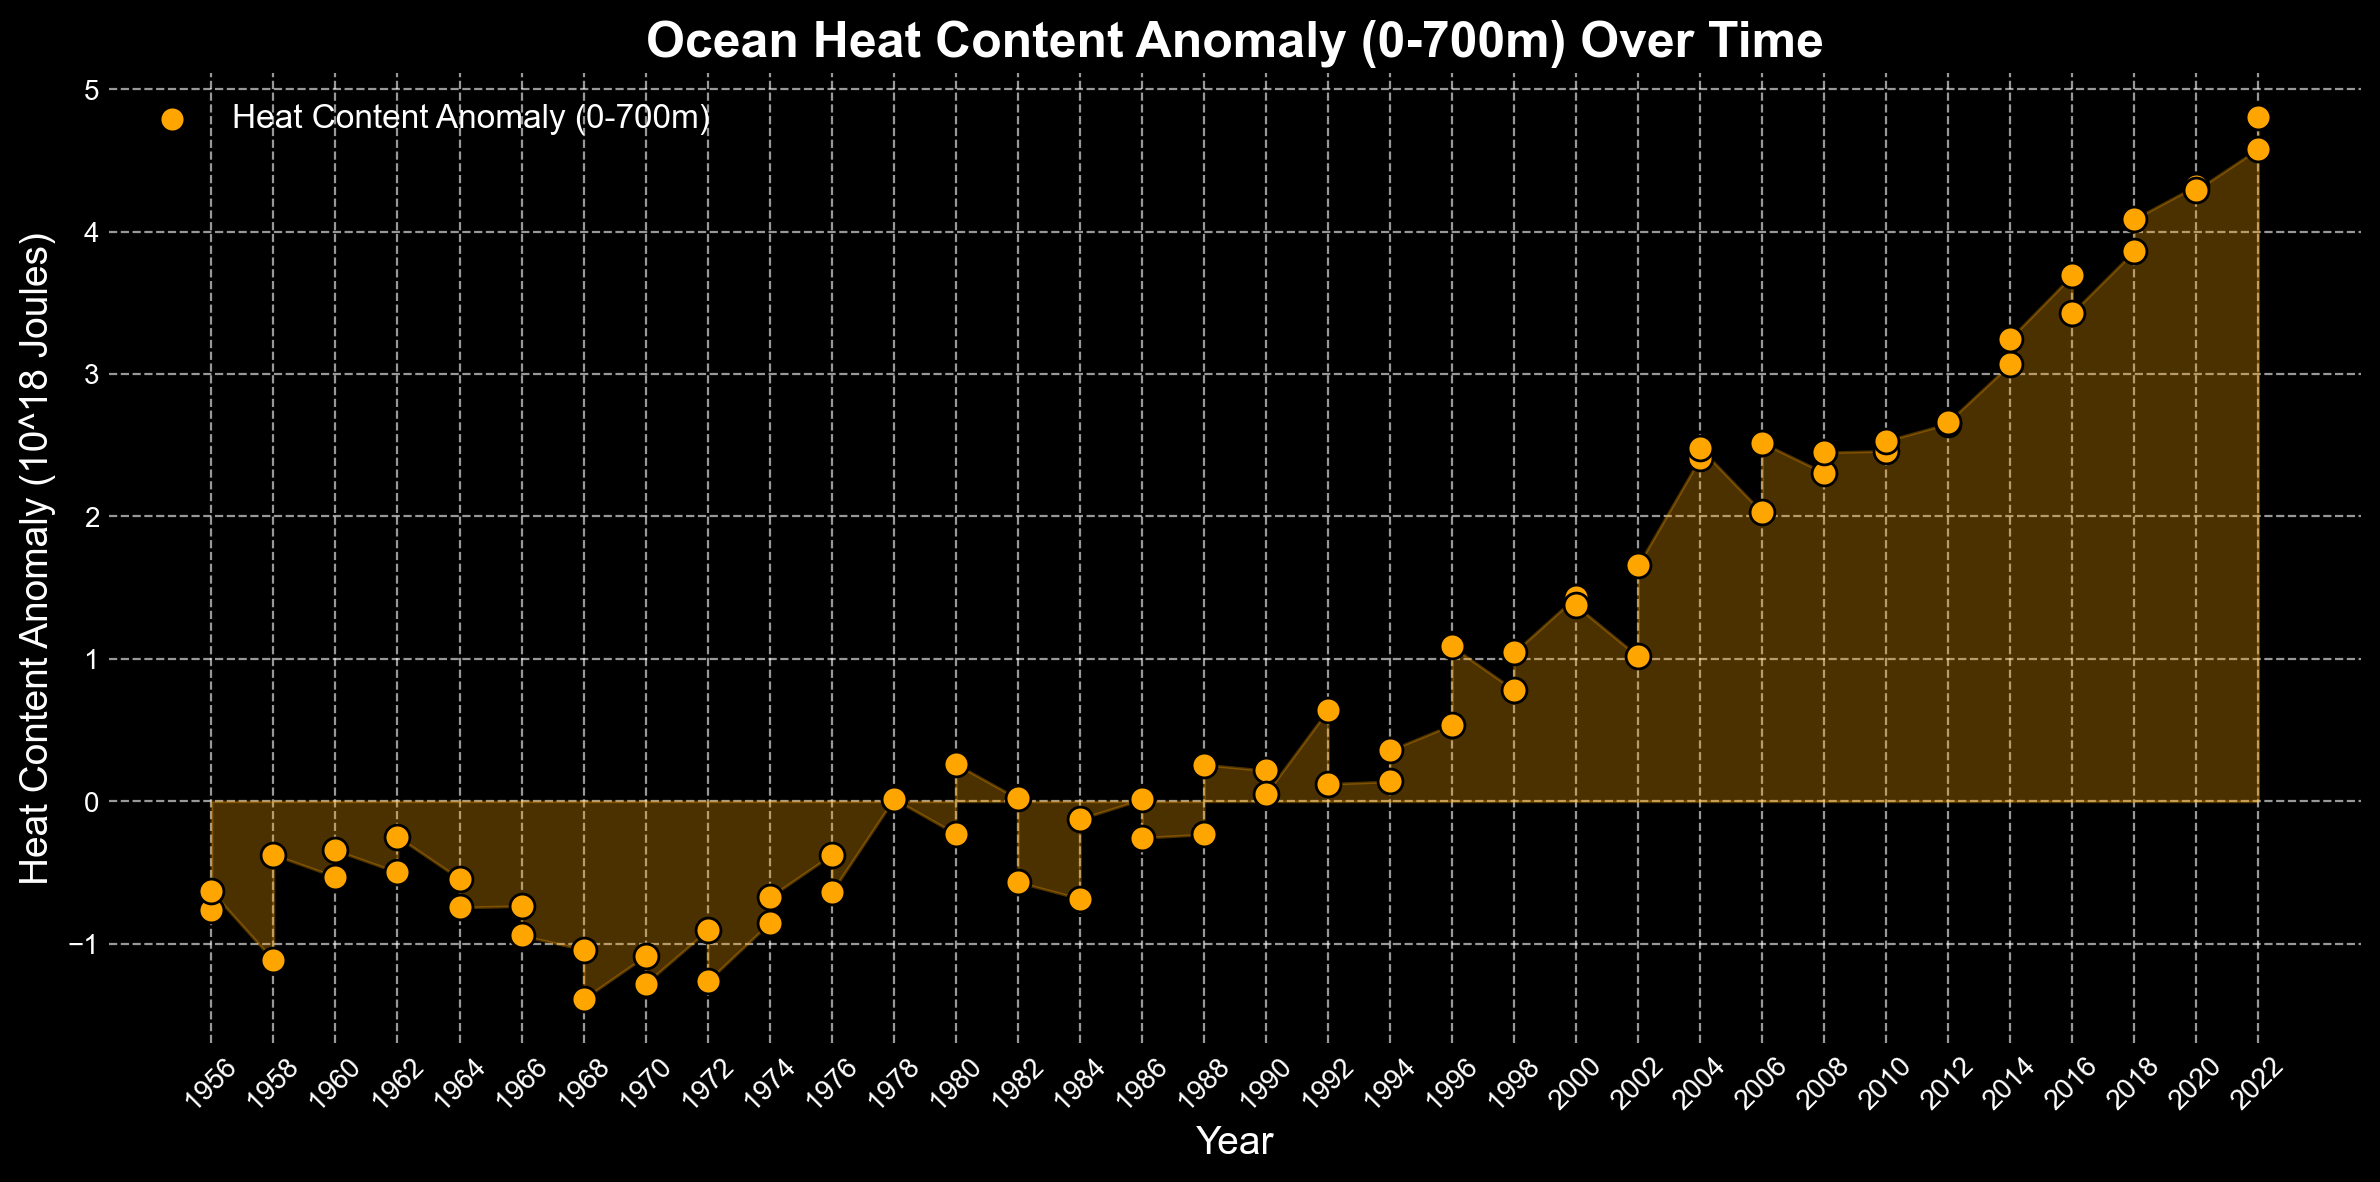

In [677]:
plt.figure(figsize=(12, 6))

# Scatter plot with enhanced markers and line style
plt.scatter(time_as_years_0_700_rounded, heat_content_0_700_avg, color='orange', s=80, label="Heat Content Anomaly (0-700m)", edgecolor='black', zorder=3)

# Adding shaded area around the points
plt.fill_between(time_as_years_0_700_rounded, heat_content_0_700_avg, color='orange', alpha=0.3)  # Alpha controls transparency

# Customize title, labels, and grid
plt.title("Ocean Heat Content Anomaly (0-700m) Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Heat Content Anomaly (10^18 Joules)", fontsize=14)

# Grid customization
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Set x-ticks to display every 5 years
plt.xticks(np.arange(min(time_as_years_0_700_rounded), max(time_as_years_0_700_rounded) + 1, 2))

# Adjust layout for a better fit
plt.tight_layout()

# Add legend for clarity
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()

#### Figure 2: Ocean Heat Content Anomaly (0-700m) Over Time (1955-2023)
The temporal evolution of the ocean heat content anomaly from the surface to 700 meters depth. Data represent monthly anomalies averaged across all latitudes and longitudes. The analysis reveals substantial variability over the time period, with a notable increase in heat content from the late 20th century into the 21st century. This trend is indicative of ongoing ocean warming, likely driven by climate change. The values are anomalies from a baseline period, highlighting the deviations from average conditions.

In [678]:
halosteric_sea_level_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    b_mm_hs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_b_mm_se_IO    (time) float32 ...
    yearl_b_mm_NI       (time) float32 ...
    yearl_b_mm_se_NI    (time) float32 ...
    yearl_b_mm_SI       (time) float32 ...
    yearl_b_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean halosteric sea level anomalies from...
    summary:                         Mean halosteric sea level anomaly from i...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [679]:
halosteric_sea_level_0_2000['b_mm_hs']

<xarray.DataArray 'b_mm_hs' (time: 18, depth: 1, lat: 180, lon: 360)>
[1166400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) float32 606.0 618.0 630.0 642.0 ... 774.0 786.0 798.0 810.0
Dimensions without coordinates: depth
Attributes:
    long_name:     mean halosteric sea level anomaly calculated from objectiv...
    coordinates:   time lat lon depth
    cell_methods:  area: mean depth: mean time: mean
    grid_mapping:  crs
    units:         millimeters

In [680]:
halo_time_0_2000 = halosteric_sea_level_0_2000['time'].values
base_year = 2005
halo_time_as_years_0_2000 = base_year + (halo_time_0_2000 / 12) - 50.5
print(halo_time_as_years_0_2000[:18])

[2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.]


In [681]:
halosteric_anomaly = halosteric_sea_level_0_2000['b_mm_hs'].mean(dim=['lat', 'lon', 'depth']).values 

In [682]:
halosteric_anomaly

array([ 0.7976122 , -0.18433177, -2.270644  , -0.6372399 , -1.5038126 ,
       -0.04228672, -2.3775096 ,  0.01063291, -1.575014  , -0.13763078,
       -2.3280256 , -0.37844005, -2.700324  , -1.4606621 , -2.4776156 ,
       -2.7072043 , -4.126559  , -5.4626403 ], dtype=float32)

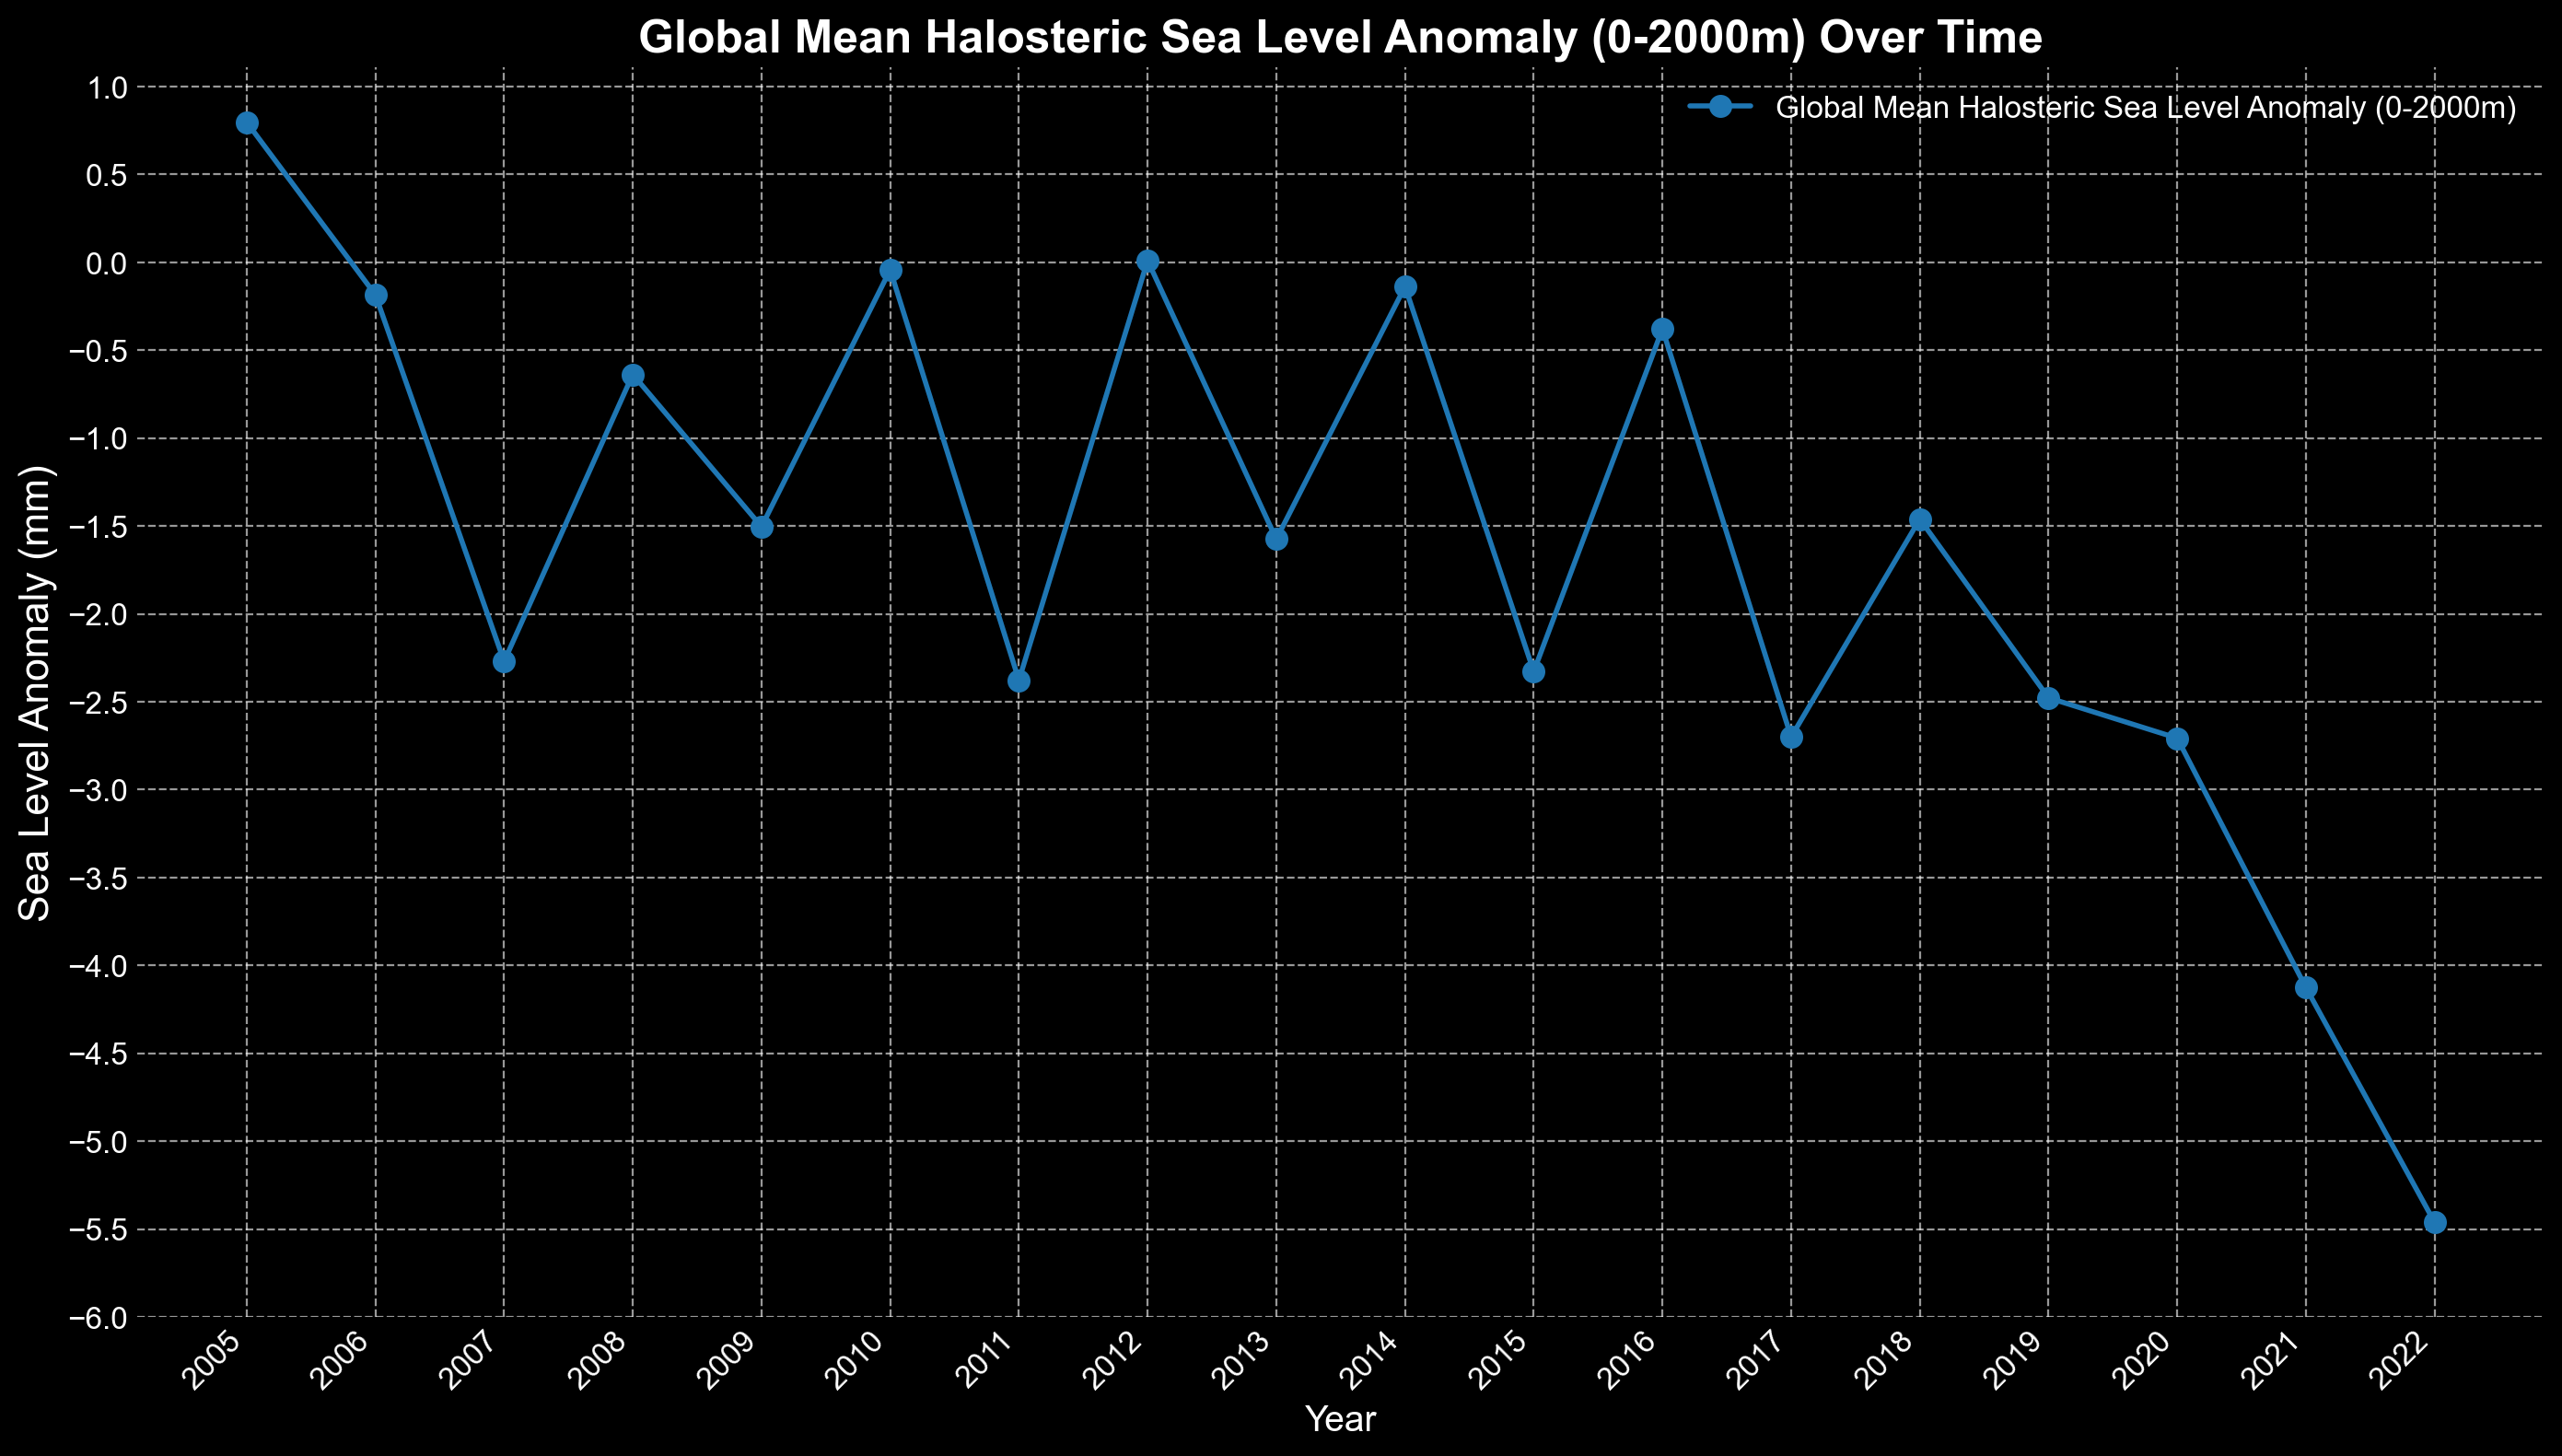

In [683]:
plt.figure(figsize=(14, 8))
plt.plot(halo_time_as_years_0_2000, halosteric_anomaly, label="Global Mean Halosteric Sea Level Anomaly (0-2000m)", 
         color='tab:blue', linestyle='-', marker='o', markersize=8, linewidth=2, alpha=1)

plt.title("Global Mean Halosteric Sea Level Anomaly (0-2000m) Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sea Level Anomaly (mm)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
y_min = np.floor(min(halosteric_anomaly))  
y_max = np.ceil(max(halosteric_anomaly))   
y_ticks = np.arange(y_max, y_min - 0.5, -0.5)  
plt.yticks(y_ticks, fontsize=12)
plt.xticks(np.arange(min(halo_time_as_years_0_2000), max(halo_time_as_years_0_2000) + 1, 1), 
           rotation=45, ha='right', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

#### Figure 3: Global Mean Halosteric Sea Level Anomaly (0-2000m) Over Time (2005 to 2022)
An illustration the global mean halosteric sea level anomaly (in millimeters) from 2054 to 2023. The time series represents the anomaly values over an 18-year period, with markers indicating individual monthly data points. A soft fill under the curve highlights the trends in sea level changes due to variations in salinity and temperature in the upper ocean layers (0-2000 meters). The x-axis shows the time in years, while the y-axis indicates the sea level anomaly in millimeters. The plot provides an overview of the temporal variations in halosteric sea level changes, with gridlines and labels formatted for easy interpretation.

In [684]:
halosteric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    b_mm_hs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_b_mm_se_IO    (time) float32 ...
    yearl_b_mm_NI       (time) float32 ...
    yearl_b_mm_se_NI    (time) float32 ...
    yearl_b_mm_SI       (time) float32 ...
    yearl_b_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean halosteric sea level anomalies from...
    summary:                         Mean halosteric sea level anomaly from i...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [685]:
halosteric_sea_level_0_700['b_mm_hs']

<xarray.DataArray 'b_mm_hs' (time: 18, depth: 1, lat: 180, lon: 360)>
[1166400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) float32 606.0 618.0 630.0 642.0 ... 774.0 786.0 798.0 810.0
Dimensions without coordinates: depth
Attributes:
    long_name:     mean halosteric sea level anomaly calculated from objectiv...
    coordinates:   time lat lon depth
    cell_methods:  area: mean depth: mean time: mean
    grid_mapping:  crs
    units:         millimeters

In [686]:
global_mean = halosteric_sea_level_0_700['b_mm_hs'].mean(dim=['lat', 'lon']).values
northern_hemisphere = halosteric_sea_level_0_700['yearl_b_mm_NH'].values
southern_hemisphere = halosteric_sea_level_0_700['yearl_b_mm_SH'].values

In [687]:
base_date = pd.to_datetime('1955-01-01')
time_var = halosteric_sea_level_0_700['time']
time_years = [base_date + pd.DateOffset(months=int(month)) for month in time_var.values]

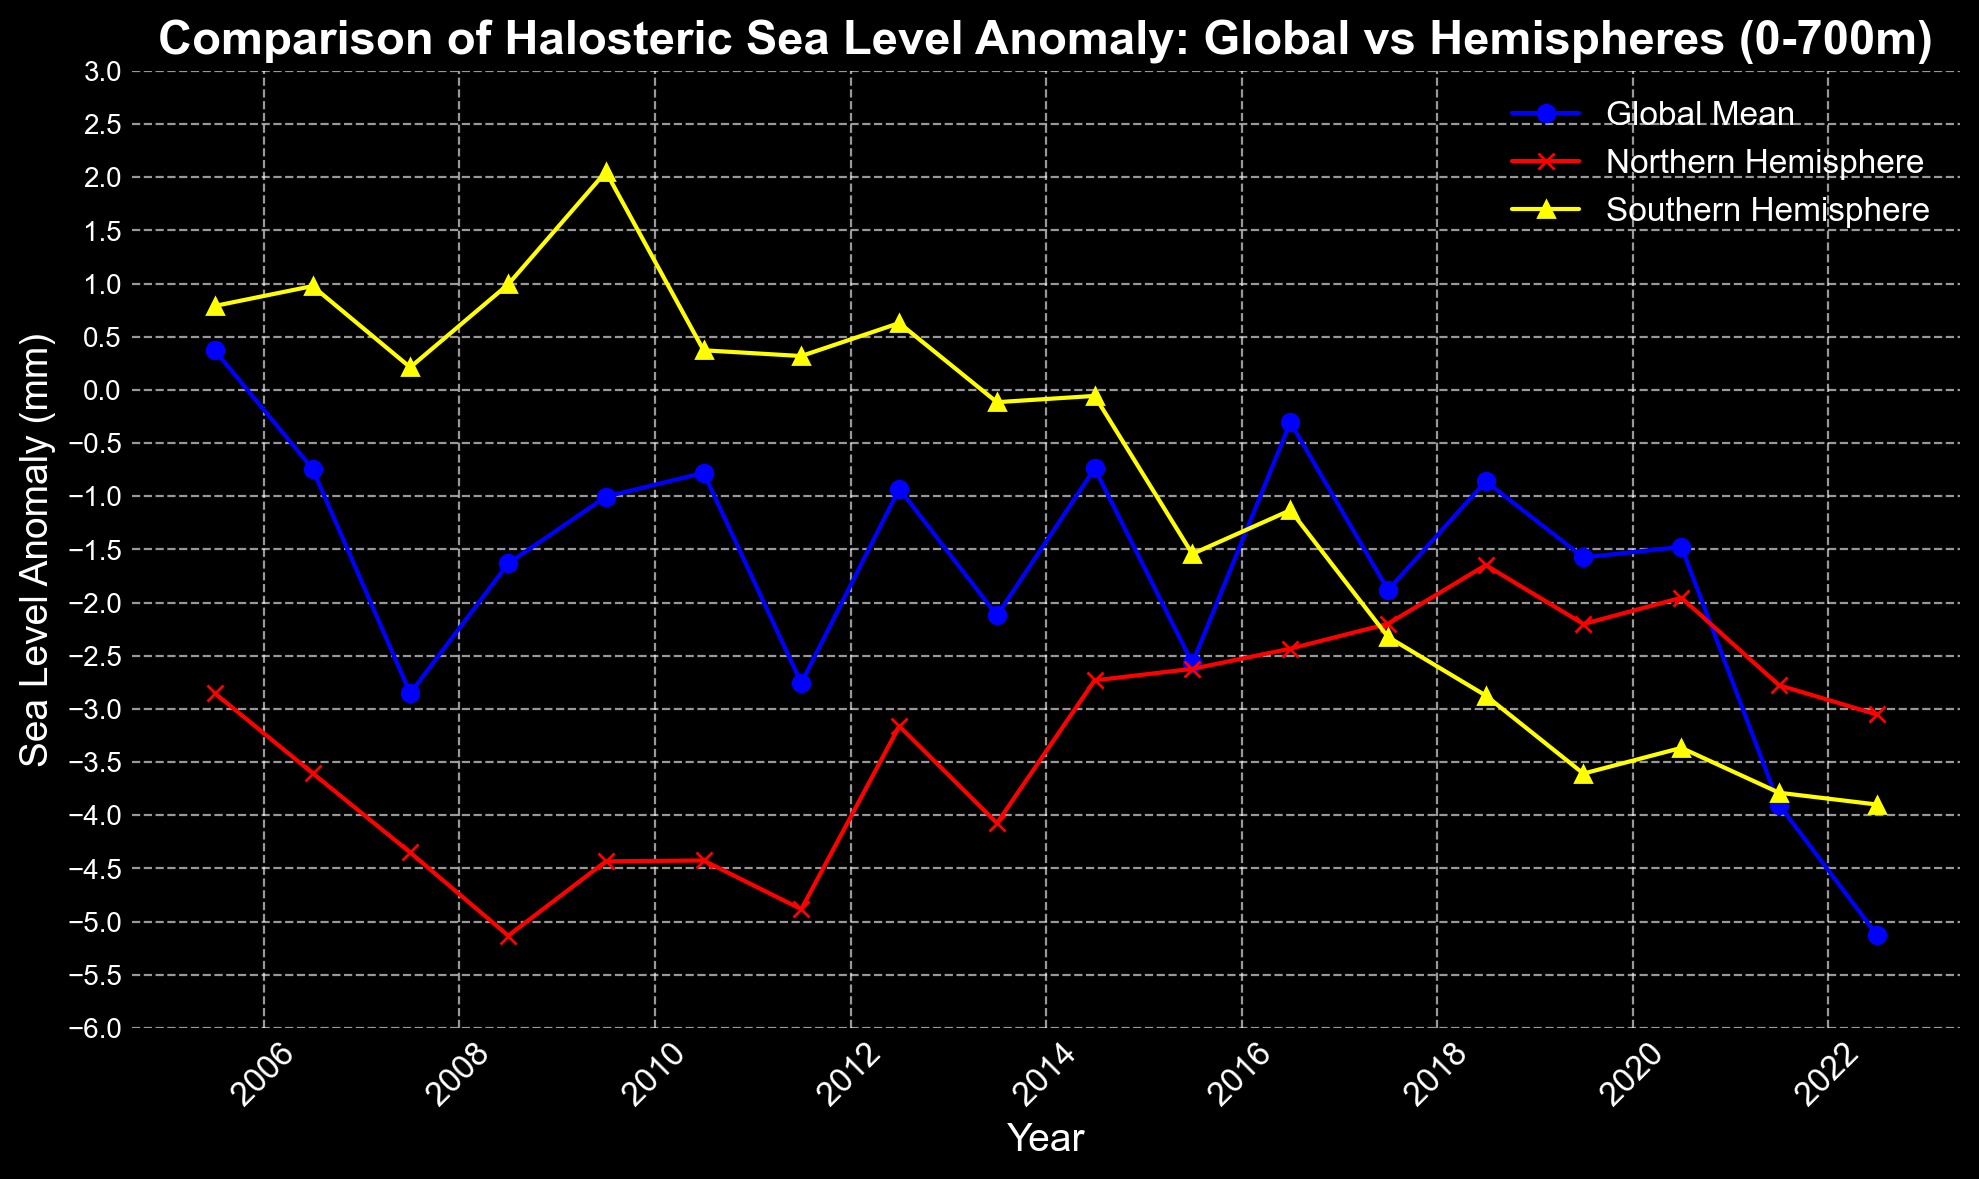

In [688]:
plt.figure(figsize=(10, 6))
plt.plot(time_years, global_mean, color='blue', label='Global Mean', linestyle='-', marker='o')
plt.plot(time_years, northern_hemisphere, color='red', label='Northern Hemisphere', linestyle='-', marker='x')
plt.plot(time_years, southern_hemisphere, color='yellow', label='Southern Hemisphere', linestyle='-', marker='^')
plt.title('Comparison of Halosteric Sea Level Anomaly: Global vs Hemispheres (0-700m)', fontsize=17, fontweight='bold')  
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
min_y = min(global_mean.min(), northern_hemisphere.min(), southern_hemisphere.min()) 
max_y = max(global_mean.max(), northern_hemisphere.max(), southern_hemisphere.max())  
plt.yticks(np.arange(np.floor(min_y), np.ceil(max_y) + 0.5, 0.5)) 
plt.ylim(np.floor(min_y), np.ceil(max_y)) 
plt.tight_layout()
plt.show()

#### Figure 4: Comparison of Halosteric Sea Level Anomalies (0-700m) for Global and Hemispheric Regions
This plot shows the mean halosteric sea level anomalies (in millimeters) from the years 2004 to 2022 for the global ocean, Northern Hemisphere, and Southern Hemisphere, derived from the halosteric_sea_level_0_700 dataset. The time series spans 18 time steps, with each point representing the anomaly for a given year, based on monthly data. The anomalies reflect the effects of salinity-driven changes in sea level within the upper 700 meters of the ocean. The global mean is depicted in blue, the Northern Hemisphere in red, and the Southern Hemisphere in green. These trends highlight the spatial and temporal variations in halosteric sea level changes between different regions of the ocean.



In [689]:
thermosteric_sea_level_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    a_mm_ts             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_a_mm_se_IO    (time) float32 ...
    yearl_a_mm_NI       (time) float32 ...
    yearl_a_mm_se_NI    (time) float32 ...
    yearl_a_mm_SI       (time) float32 ...
    yearl_a_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean thermosteric sea level anomalies fr...
    summary:                         Mean thermosteric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [690]:
time_in_months = thermosteric_sea_level_0_2000['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(months)) for months in time_in_months]
print(time[:5])

[Timestamp('2005-07-16 00:00:00'), Timestamp('2006-07-16 00:00:00'), Timestamp('2007-07-16 00:00:00'), Timestamp('2008-07-16 00:00:00'), Timestamp('2009-07-16 00:00:00')]


In [691]:
time_in_months = thermosteric_sea_level_0_2000['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(month)) for month in time_in_months]
sea_level_anomaly_2000_NH = thermosteric_sea_level_0_2000['yearl_a_mm_NH'].values
sea_level_anomaly_2000_SH = thermosteric_sea_level_0_2000['yearl_a_mm_SH'].values
sea_level_anomaly_2000_WO = thermosteric_sea_level_0_2000['yearl_a_mm_WO'].values

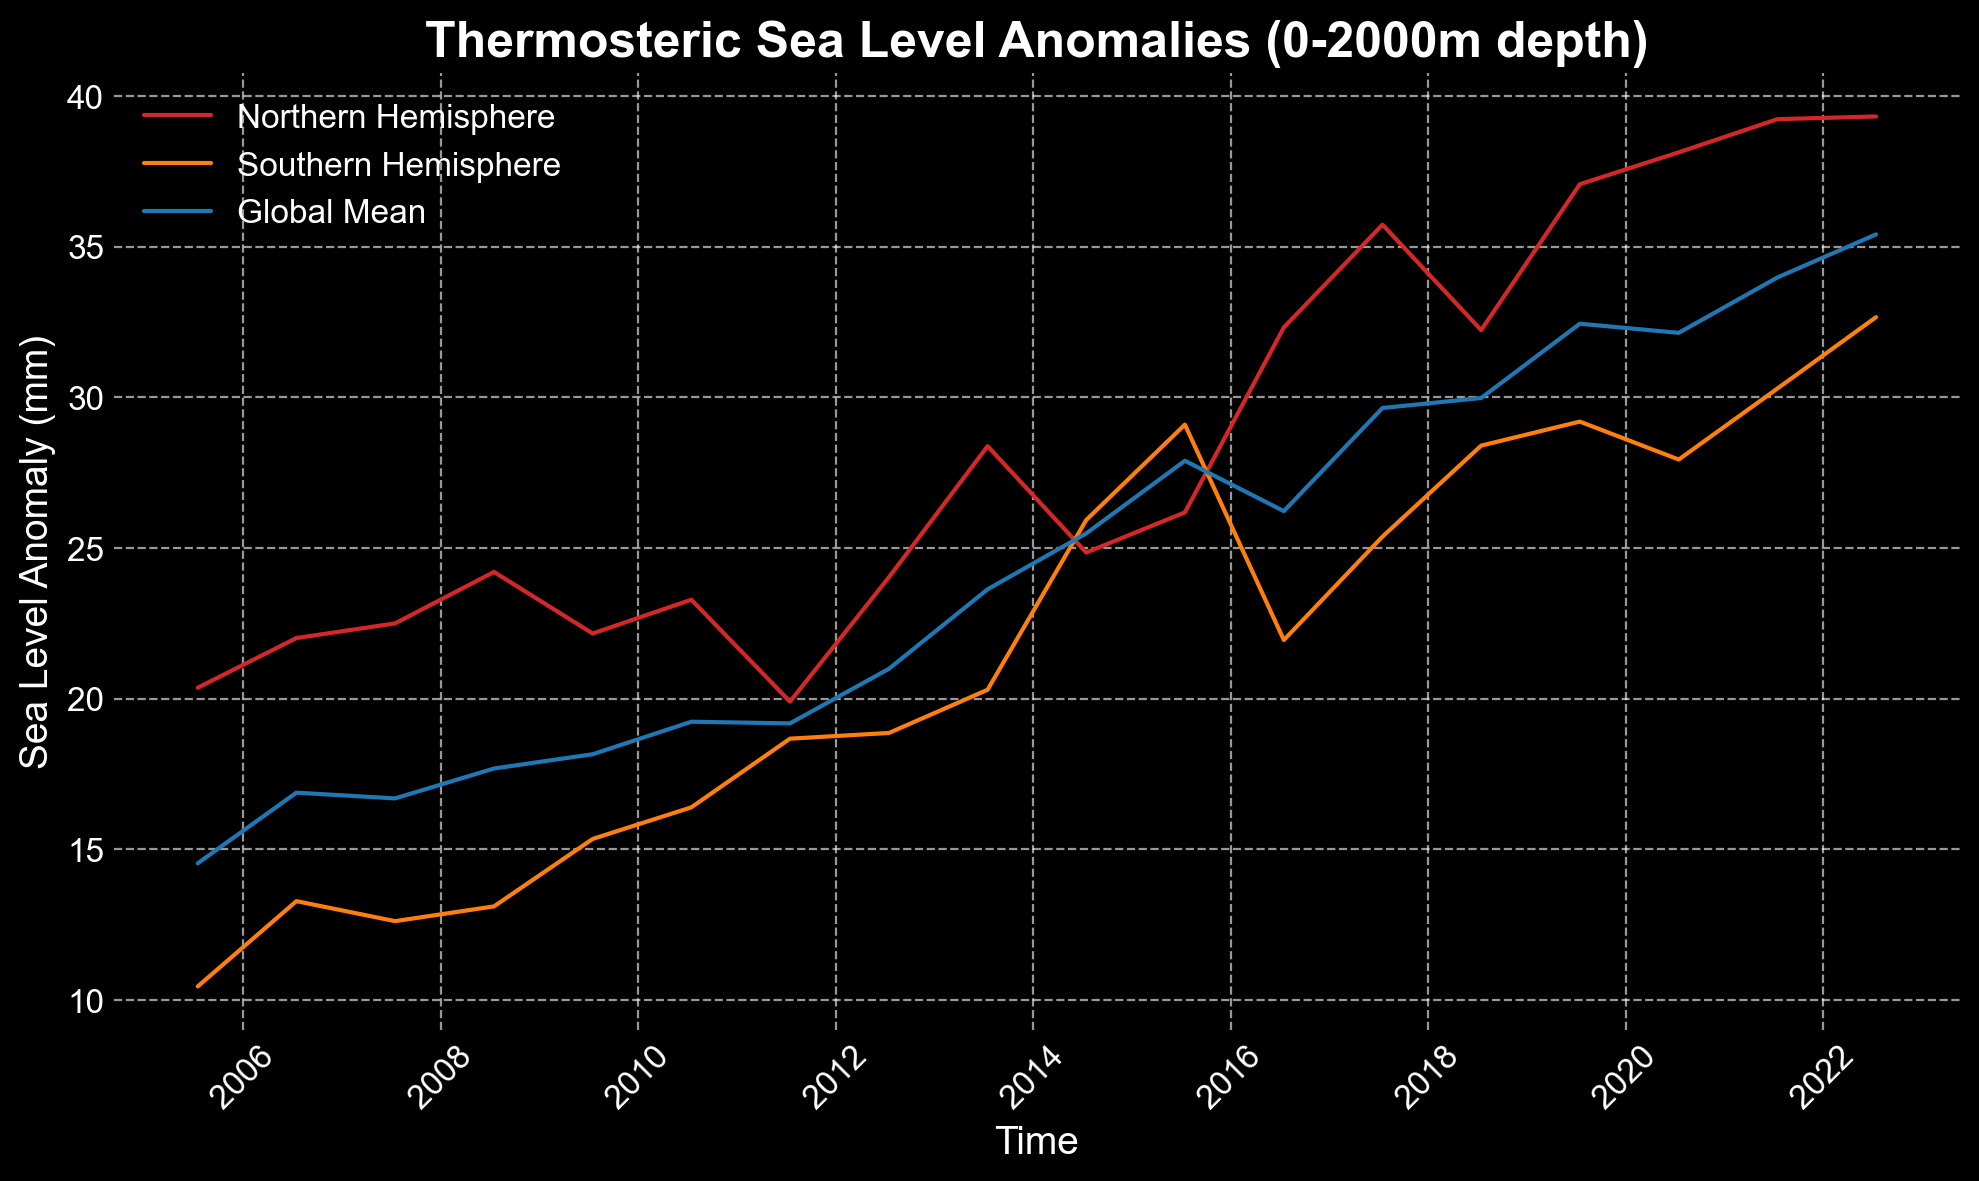

In [692]:
plt.figure(figsize=(10, 6))
plt.plot(time, sea_level_anomaly_2000_NH, label='Northern Hemisphere', color='tab:red')
plt.plot(time, sea_level_anomaly_2000_SH, label='Southern Hemisphere', color='tab:orange')  # Change this line
plt.plot(time, sea_level_anomaly_2000_WO, label='Global Mean', color='tab:blue')
plt.title('Thermosteric Sea Level Anomalies (0-2000m depth)', fontsize=18, fontweight='bold') 
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Figure 5: Thermosteric sea level anomalies (0-2000m depth) for the Northern and Southern Hemispheres over time, from January 2005 to 2023
The annual mean sea level anomaly values in millimeters for both hemispheres, with data points representing changes in sea level due to thermal expansion of ocean waters. The Northern Hemisphere trend is depicted in blue, while the Southern Hemisphere is shown in red. Both trends illustrate the variation in thermosteric sea level anomaly over an 18-year period, highlighting the different regional responses to climate-induced oceanic changes.

In [693]:
thermosteric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    a_mm_ts             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_a_mm_se_IO    (time) float32 ...
    yearl_a_mm_NI       (time) float32 ...
    yearl_a_mm_se_NI    (time) float32 ...
    yearl_a_mm_SI       (time) float32 ...
    yearl_a_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean thermosteric sea level anomalies fr...
    summary:                         Mean thermosteric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [694]:
time_in_months = thermosteric_sea_level_0_700['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(months)) for months in time_in_months]
print(time[:5])

[Timestamp('1955-07-16 00:00:00'), Timestamp('1956-07-16 00:00:00'), Timestamp('1957-07-16 00:00:00'), Timestamp('1958-07-16 00:00:00'), Timestamp('1959-07-16 00:00:00')]


In [695]:
time_in_months = thermosteric_sea_level_0_700['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(months)) for months in time_in_months]
thermo_sea_level_anomaly_700_NH = thermosteric_sea_level_0_700['yearl_a_mm_NH'].values
thermo_sea_level_anomaly_700_SH = thermosteric_sea_level_0_700['yearl_a_mm_SH'].values
thermo_sea_level_anomaly_700_WO = thermosteric_sea_level_0_700['yearl_a_mm_WO'].values

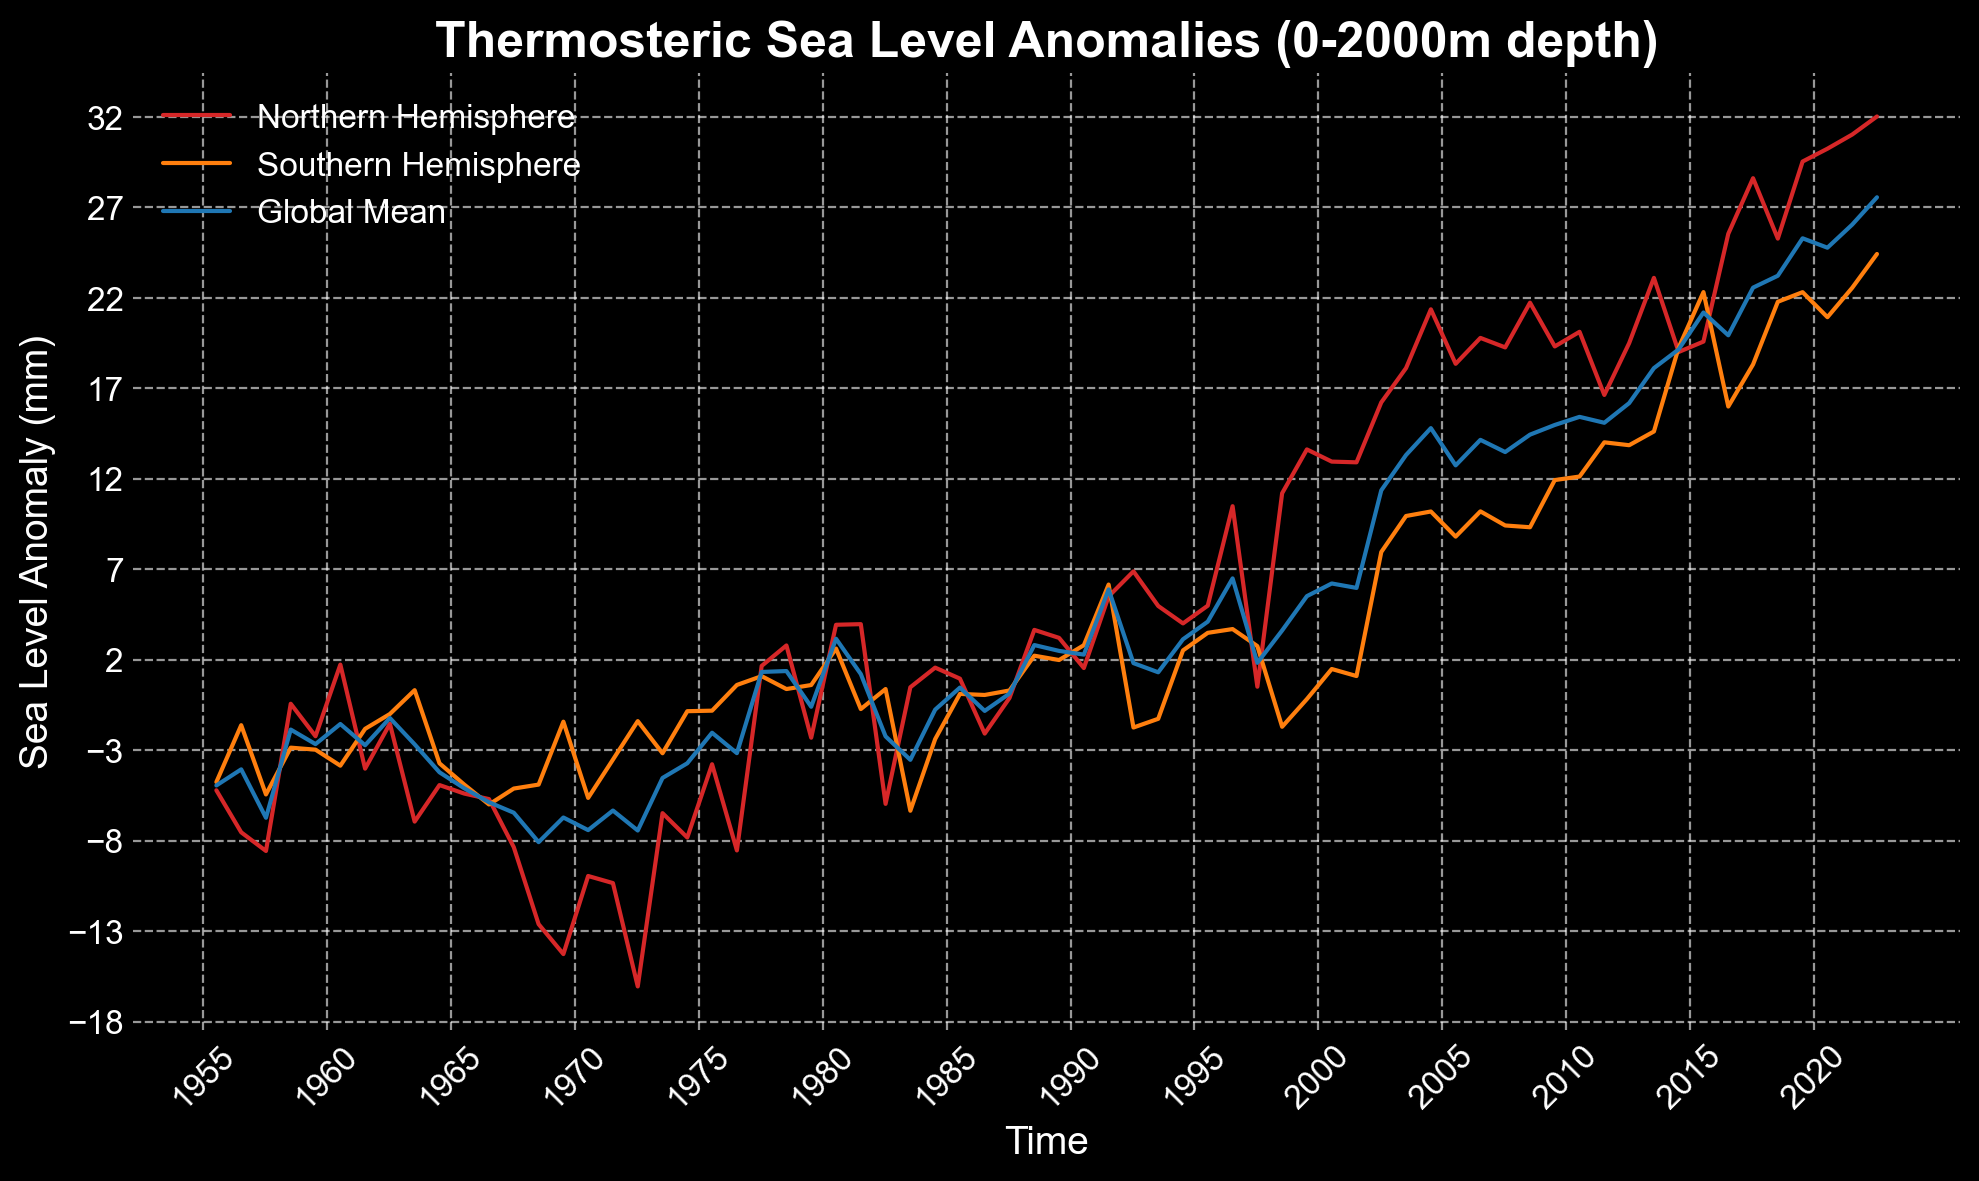

In [696]:
plt.figure(figsize=(10, 6))
plt.plot(time, thermo_sea_level_anomaly_700_NH, label='Northern Hemisphere', color='tab:red')
plt.plot(time, thermo_sea_level_anomaly_700_SH, label='Southern Hemisphere', color='tab:orange')
plt.plot(time, thermo_sea_level_anomaly_700_WO, label='Global Mean', color='tab:blue')
plt.title('Thermosteric Sea Level Anomalies (0-2000m depth)', fontsize=18, fontweight='bold') 
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
years = pd.to_datetime(time).year  
start_year = years.min()
end_year = years.max()
xticks = list(range(start_year, end_year + 1, 5))
plt.xticks(pd.to_datetime([f"{year}-01-01" for year in xticks]), labels=xticks, rotation=45, fontsize=12)
y_min, y_max = plt.ylim()  
yticks = list(range(int(y_min), int(y_max) + 1, 5))  
plt.yticks(yticks, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Figure 6: Time Series of Mean Thermosteric Sea Level Anomaly (0-700m)
The annual variation in thermosteric sea level anomaly from 1955 to 2023, based on data from the World Ocean Atlas 2009 (WOA09). The anomaly values, in millimeters, represent the mean change in sea level due to temperature variations in the upper ocean (0-700 meters). The data is averaged over latitudes and longitudes to provide a global measure of thermosteric sea level changes over time.

In [697]:
steric_sea_level_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [698]:
adjusted_time = [t - pd.DateOffset(years=0) for t in steric2000_time]
steric2000_time = [base_date + pd.DateOffset(months=int(month)) for month in steric2000_time_in_months]
print("Adjusted time values:", adjusted_time[:5])

Adjusted time values: [Timestamp('2005-07-16 00:00:00'), Timestamp('2006-07-16 00:00:00'), Timestamp('2007-07-16 00:00:00'), Timestamp('2008-07-16 00:00:00'), Timestamp('2009-07-16 00:00:00')]


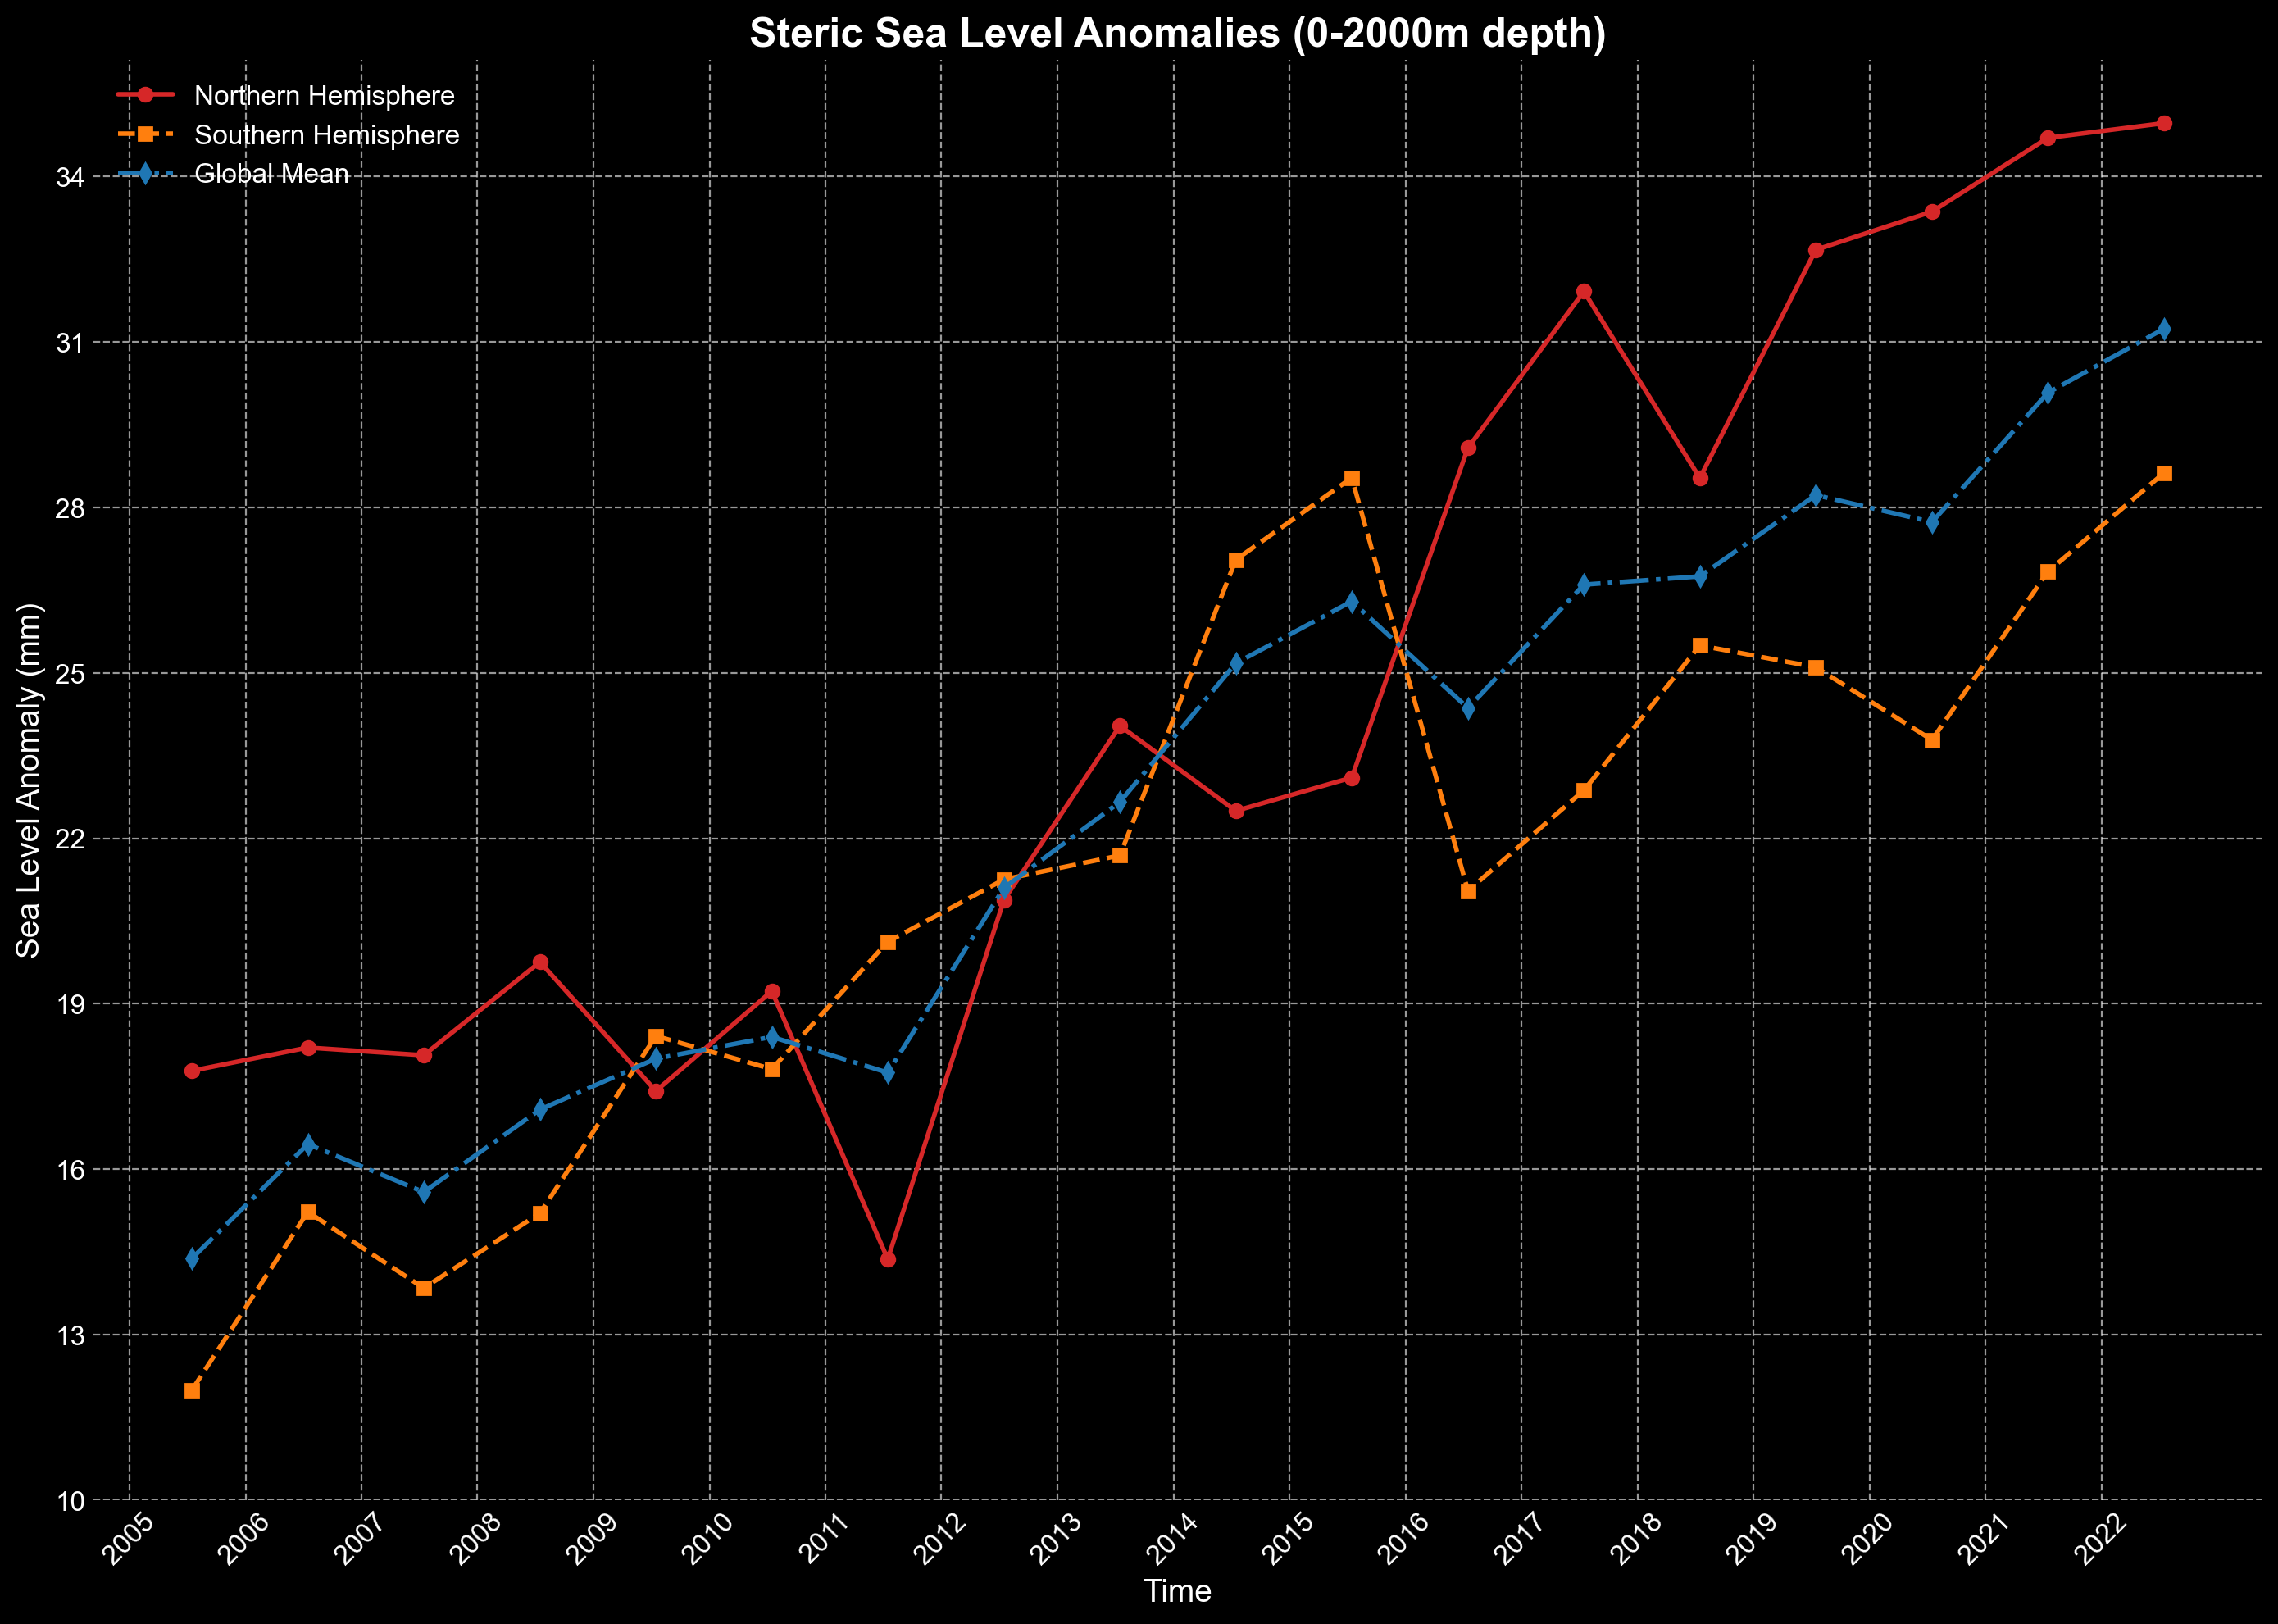

In [699]:
plt.figure(figsize=(14, 10))
plt.plot(adjusted_time, steric_sea_level_anomaly_2000_NH, label='Northern Hemisphere', color='tab:red', linestyle='-', linewidth=2, marker='o')
plt.plot(adjusted_time, steric_sea_level_anomaly_2000_SH, label='Southern Hemisphere', color='tab:orange', linestyle='--', linewidth=2, marker='s')
plt.plot(adjusted_time, steric_sea_level_anomaly_2000_WO, label='Global Mean', color='tab:blue', linestyle='-.', linewidth=2, marker='d')
plt.title('Steric Sea Level Anomalies (0-2000m depth)', fontsize=18, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
years = [t.year for t in adjusted_time]
start_year = min(years)
end_year = max(years)
xticks = list(range(start_year, end_year + 1, 1))
plt.xticks([pd.Timestamp(f'{year}-01-01') for year in xticks], labels=xticks, rotation=45, fontsize=12)
y_min, y_max = plt.ylim()
yticks = list(range(int(y_min), int(y_max) + 1, 3))
plt.yticks(yticks, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Figure 7: Time series of the steric sea level anomaly (0-2000m), showing the global average changes in sea level from 1955 to the present
The plot reflects the variations in steric sea level due to changes in ocean temperature and salinity, which can contribute significantly to overall sea level rise. It represents an annual average of the anomaly across all latitudes and longitudes.

In [700]:
steric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [701]:
steric_time_0_700 = steric_sea_level_0_700['time'].values
base_year = 2005
time_as_years_steric_700 = base_year + (time_0_2000 / 12) -50.5
print(time_as_years_steric_700[:18])

[2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.]


In [702]:
steric_sea_content_700_global = steric_sea_level_0_700['s_mm_fs'].mean(dim=['lat', 'lon', 'depth'])
time_years = np.floor(heat_content_0_2000['time'].values).astype(int) 
steric_700_trend_slope = (steric_sea_content_700_global [-1] - heat_content_2000_global[0]) / (time_years[-1] - time_years[0])
print(f"Trend 0-2000m (Global): {trend_2000_slope:.2f} units/year")

Trend 0-2000m (Global): 0.02 units/year


In [703]:
steric_sea_content_700_global = steric_sea_level_0_700['s_mm_fs'].mean(dim=['lat', 'lon', 'depth'])

In [704]:
time_as_years_steric_700 = base_year + (steric_time_0_700 / 12) - 50.5 
steric_sea_content_700_global = steric_sea_level_0_700['s_mm_fs'].mean(dim=['lat', 'lon', 'depth'])

northern_hemisphere = steric_sea_level_0_700['yearl_s_mm_NI'].values
southern_hemisphere = steric_sea_level_0_700['yearl_s_mm_SI'].values

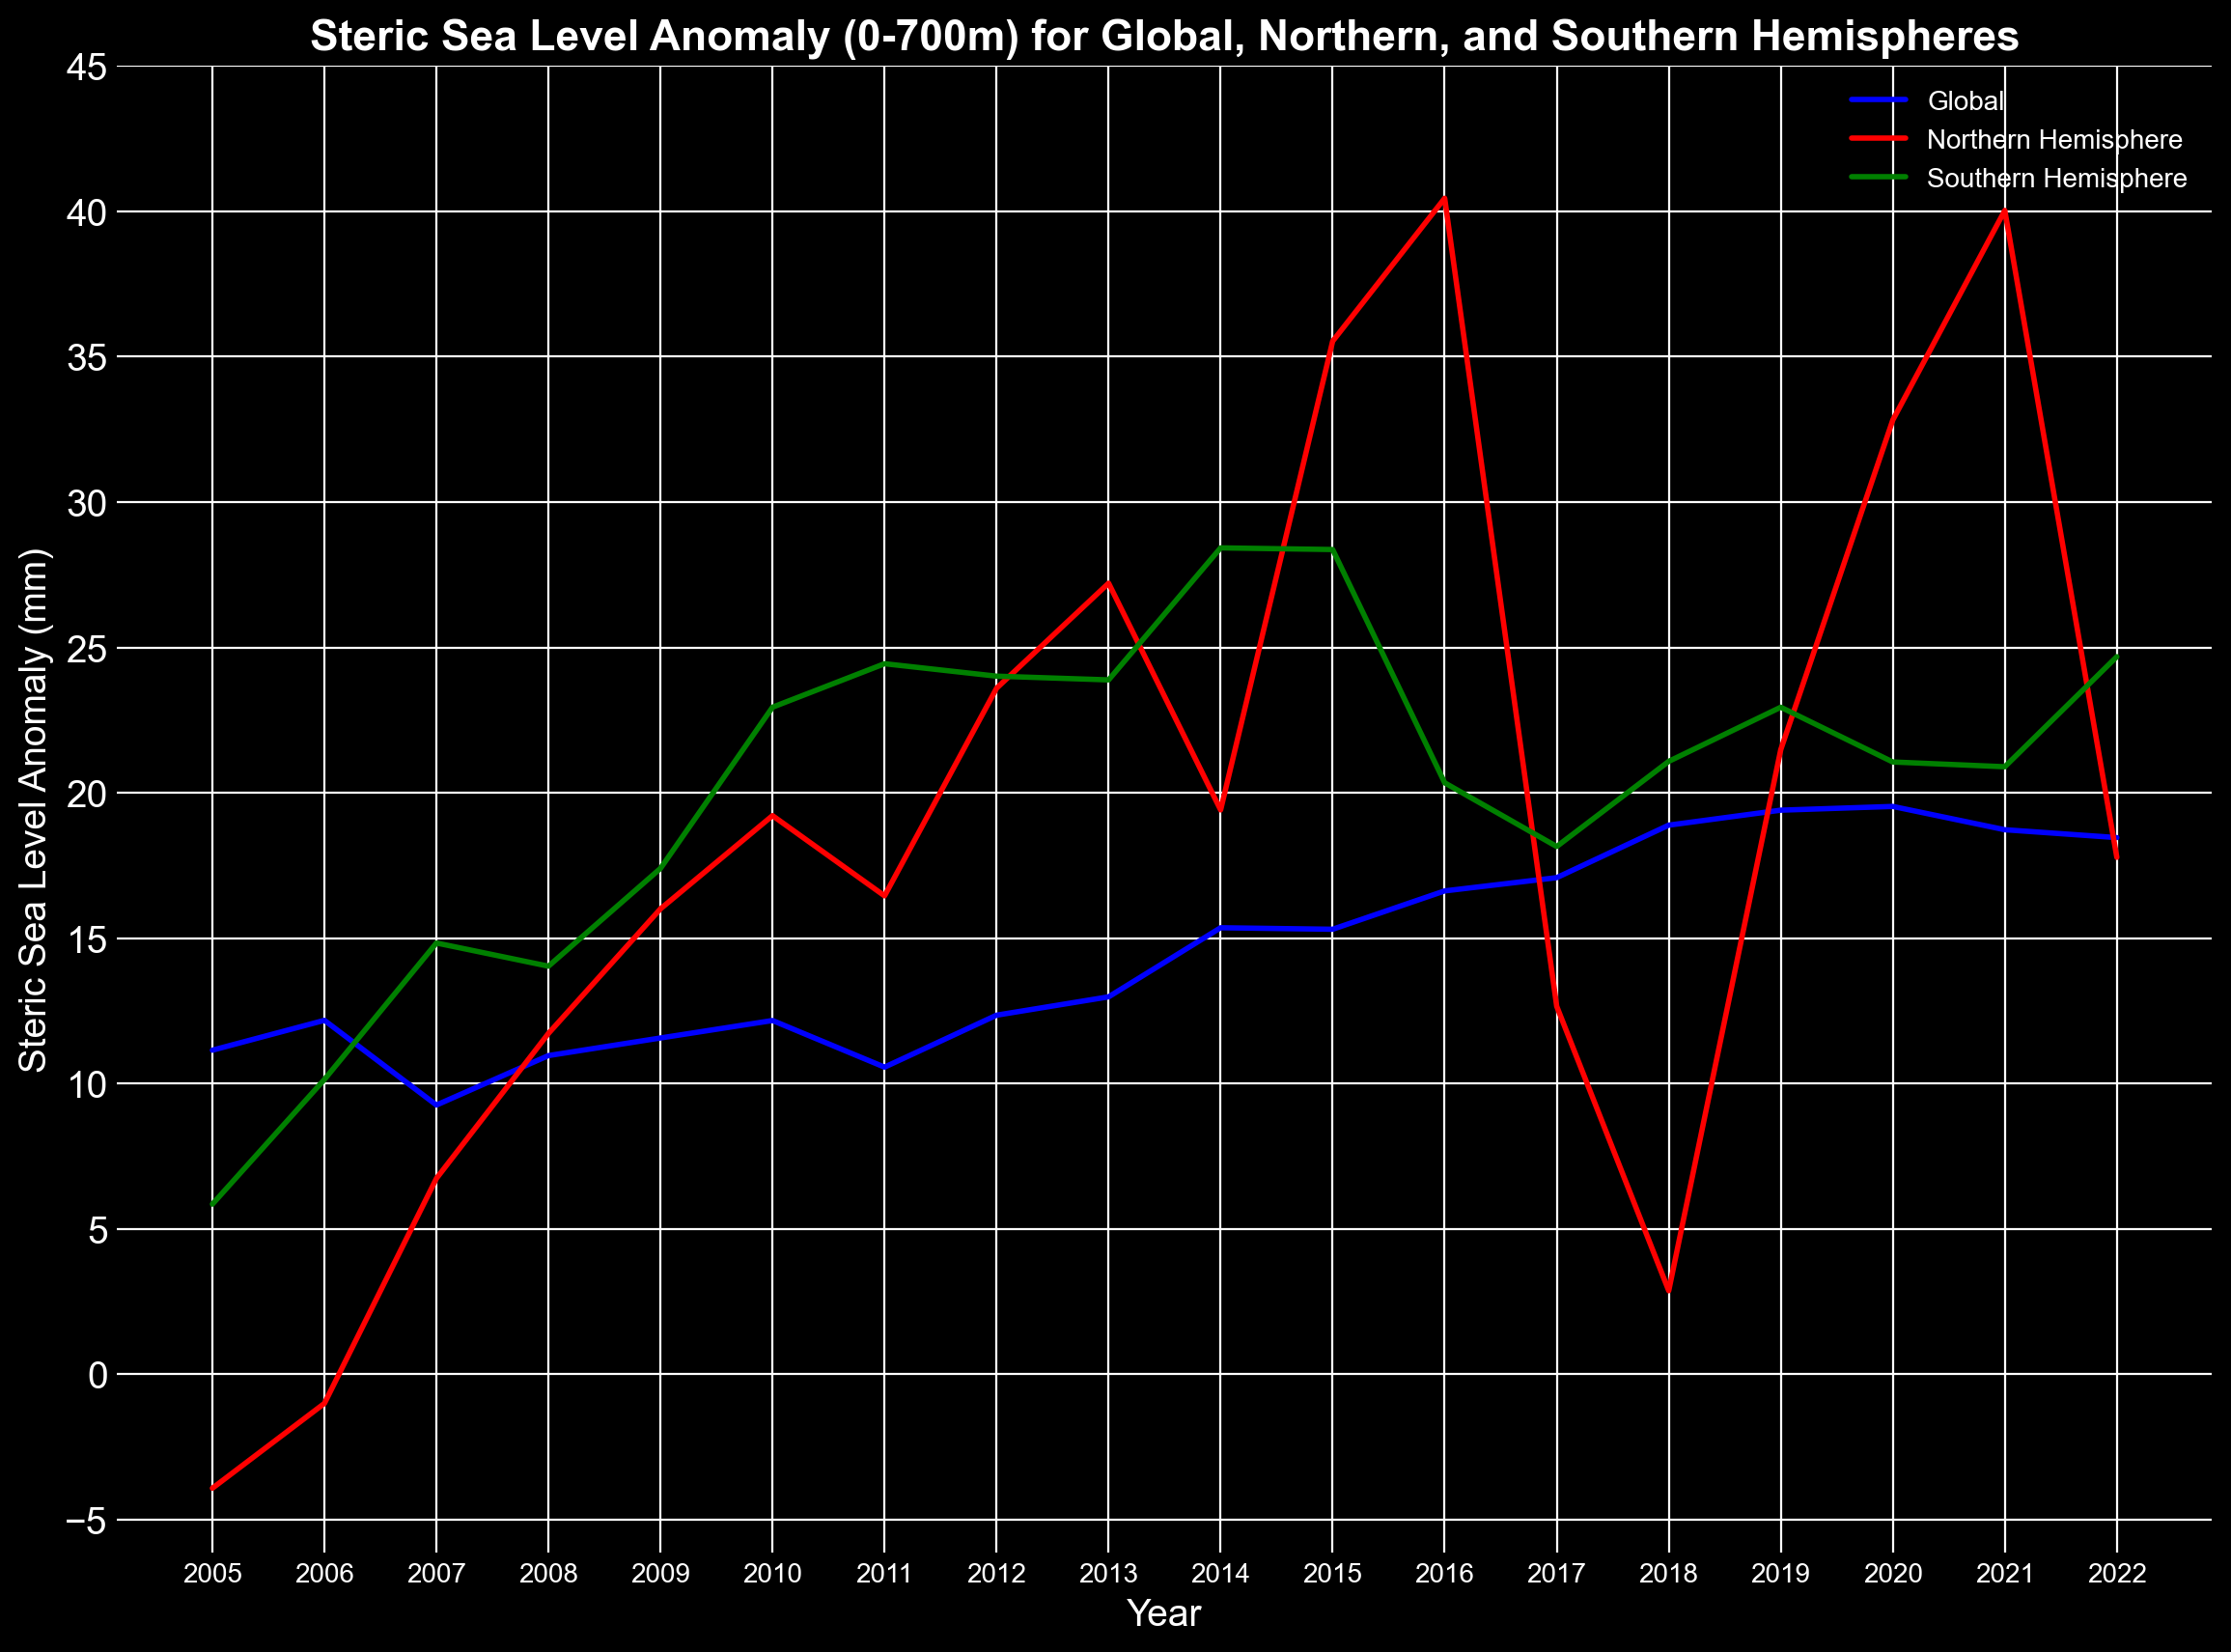

In [705]:
plt.figure(figsize=(14, 10))
plt.plot(time_as_years_steric_700, steric_sea_content_700_global, label='Global', color='blue', linewidth=2)
plt.plot(time_as_years_steric_700, northern_hemisphere, label='Northern Hemisphere', color='red', linewidth=2)
plt.plot(time_as_years_steric_700, southern_hemisphere, label='Southern Hemisphere', color='green', linewidth=2)
plt.xticks(np.arange(int(time_as_years_steric_700.min()), int(time_as_years_steric_700.max()) + 1, 1))
y_min = min(steric_sea_content_700_global.min(), northern_hemisphere.min(), southern_hemisphere.min())
y_max = max(steric_sea_content_700_global.max(), northern_hemisphere.max(), southern_hemisphere.max())
plt.yticks(np.arange(np.floor(y_min / 5) * 5, np.ceil(y_max / 5) * 5 + 5, 5))
plt.tick_params(axis='y', labelsize=14) 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Steric Sea Level Anomaly (mm)', fontsize=14)
plt.title('Steric Sea Level Anomaly (0-700m) for Global, Northern, and Southern Hemispheres', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

#### Figure 8: Time series of the steric sea level anomaly (0-700m depth range) from 1955-1972
The annual variation in steric sea level, with positive and negative anomalies indicating periods of sea level rise and fall, respectively. This analysis is based on data from the steric_sea_level_0_700 dataset, specifically the variable yearl_s_mm_WO. The trends and fluctuations in the data reflect changes in ocean volume due to temperature-induced expansion and contraction of seawater over time.

# ESM4 Model Sea Salinity

In [147]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [148]:
gfdl_esm4_so_data = google_cloud_cmip6.query(
    "activity_id=='CMIP' & \
    table_id == 'Omon' & \
    variable_id == 'so' & \
    experiment_id == 'historical' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'" 
)

In [149]:
gfdl_esm4_so_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
245217,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,so,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [150]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = gfdl_esm4_so_data.zstore.values[-1]
mapper = gcs.get_mapper(zstore)
gfdl_esm4_so_data = xr.open_zarr(mapper, consolidated=True)
gfdl_esm4_so_data

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lev: 35, lon: 360, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    so         (time, lev, lat, lon) float32 dask.array<chunksize=(12, 35, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            so
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/e61aa2fb-e885-4212-9284-9a77ba0f55e5...
    version_id:             v20190726

In [151]:
gfdl_esm4_so=gfdl_esm4_so_data.so

In [152]:
def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

In [159]:
lat_esm4 =gfdl_esm4_so.coords['lat'].values 
lon_esm4 = gfdl_esm4_so.coords['lon'].values 

areacell = standard_grid_cell_area(lat_esm4,lon_esm4)  
areacell_esm4 = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),\
                                                coords=(gfdl_esm4_so.coords['lat'],\
                                                        gfdl_esm4_so.coords['lon']))

In [161]:
print(gfdl_esm4_so.lon.values)  # Check lon values
print(gfdl_esm4_so.lat.values)  # Check lat values
print(gfdl_esm4_so.lev.values)  # Check depth levels
print(gfdl_esm4_so.time.values)  # Check time range

[-179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 -172.5 -171.5 -170.5
 -169.5 -168.5 -167.5 -166.5 -165.5 -164.5 -163.5 -162.5 -161.5 -160.5
 -159.5 -158.5 -157.5 -156.5 -155.5 -154.5 -153.5 -152.5 -151.5 -150.5
 -149.5 -148.5 -147.5 -146.5 -145.5 -144.5 -143.5 -142.5 -141.5 -140.5
 -139.5 -138.5 -137.5 -136.5 -135.5 -134.5 -133.5 -132.5 -131.5 -130.5
 -129.5 -128.5 -127.5 -126.5 -125.5 -124.5 -123.5 -122.5 -121.5 -120.5
 -119.5 -118.5 -117.5 -116.5 -115.5 -114.5 -113.5 -112.5 -111.5 -110.5
 -109.5 -108.5 -107.5 -106.5 -105.5 -104.5 -103.5 -102.5 -101.5 -100.5
  -99.5  -98.5  -97.5  -96.5  -95.5  -94.5  -93.5  -92.5  -91.5  -90.5
  -89.5  -88.5  -87.5  -86.5  -85.5  -84.5  -83.5  -82.5  -81.5  -80.5
  -79.5  -78.5  -77.5  -76.5  -75.5  -74.5  -73.5  -72.5  -71.5  -70.5
  -69.5  -68.5  -67.5  -66.5  -65.5  -64.5  -63.5  -62.5  -61.5  -60.5
  -59.5  -58.5  -57.5  -56.5  -55.5  -54.5  -53.5  -52.5  -51.5  -50.5
  -49.5  -48.5  -47.5  -46.5  -45.5  -44.5  -43.5  -42.5  -41.5  -40.5
  -39.

In [162]:
surface_salinity = gfdl_esm4_so.sel(lev=2.5)
print(surface_salinity)

<xarray.DataArray 'so' (time: 1980, lat: 180, lon: 360)>
dask.array<getitem, shape=(1980, 180, 360), dtype=float32, chunksize=(12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 2.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Salinity
    original_name:  so
    standard_name:  sea_water_salinity
    units:          0.001


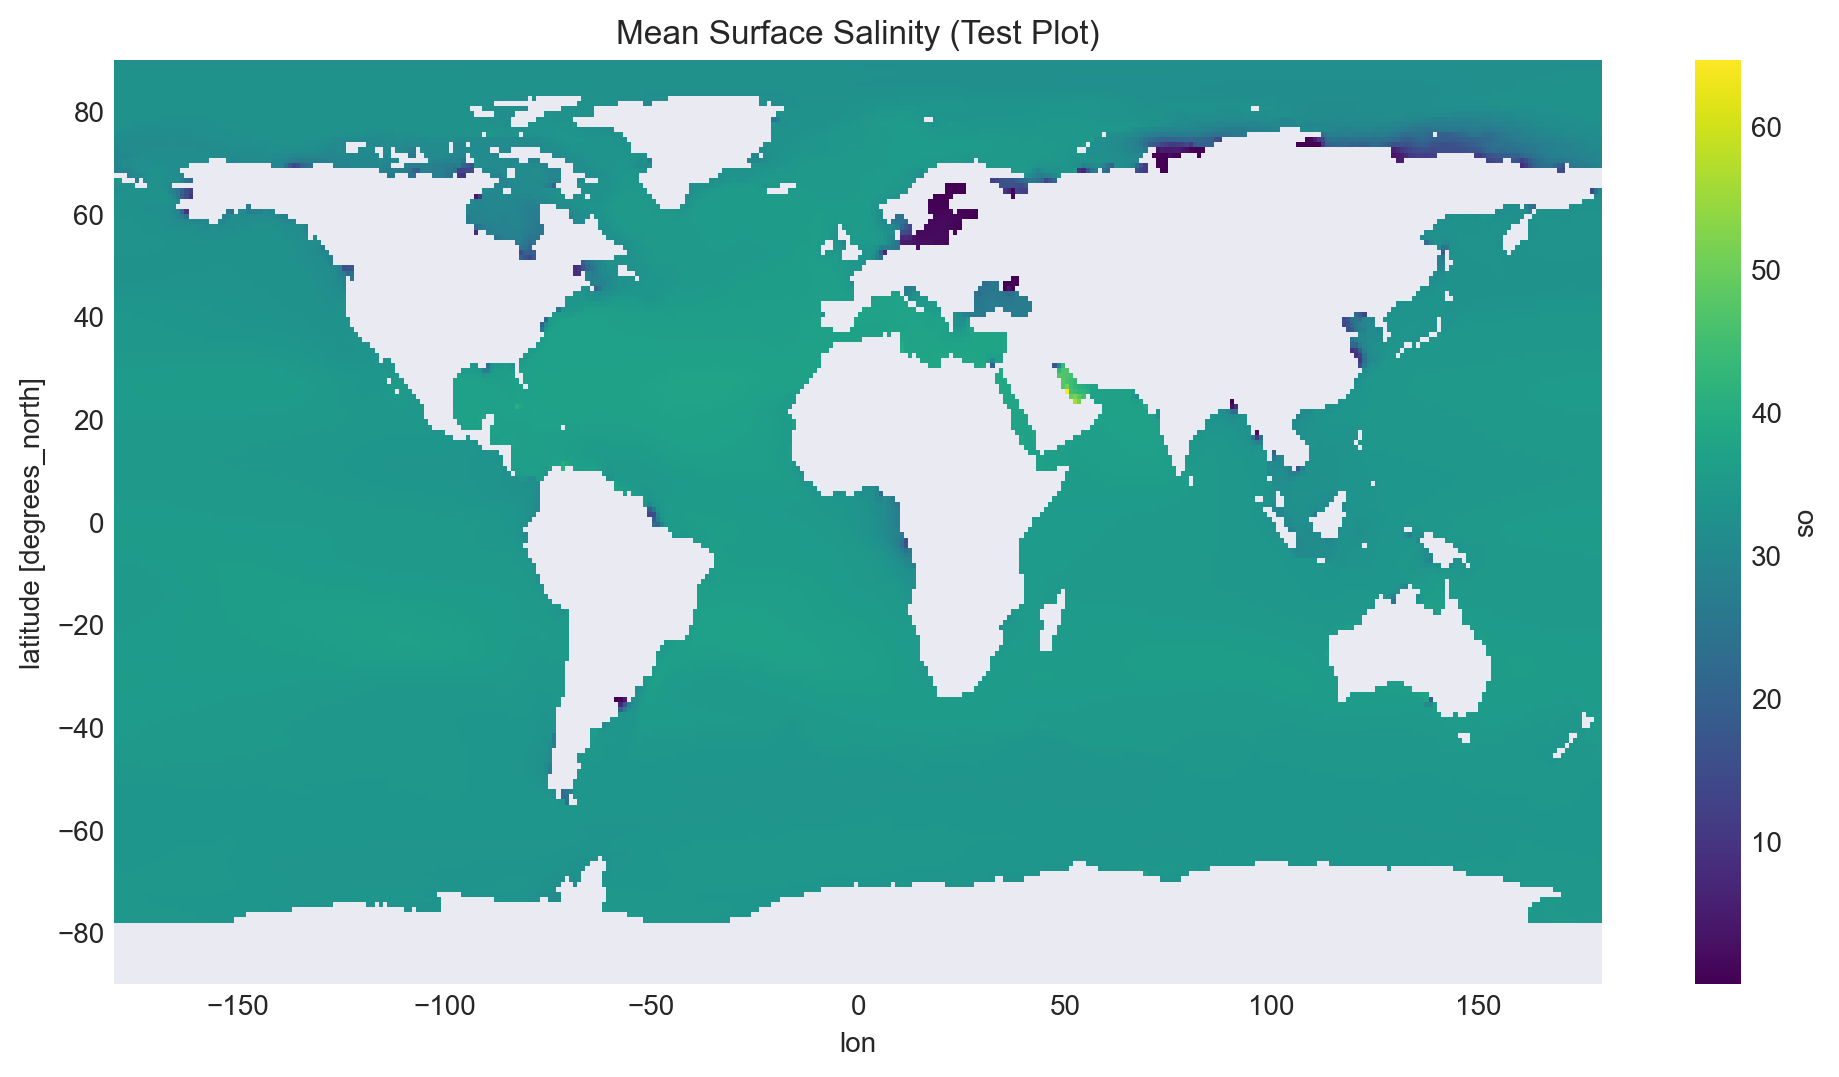

In [164]:
surface_salinity.mean(dim="time").plot()
plt.title("Mean Surface Salinity (Test Plot)")
plt.show()

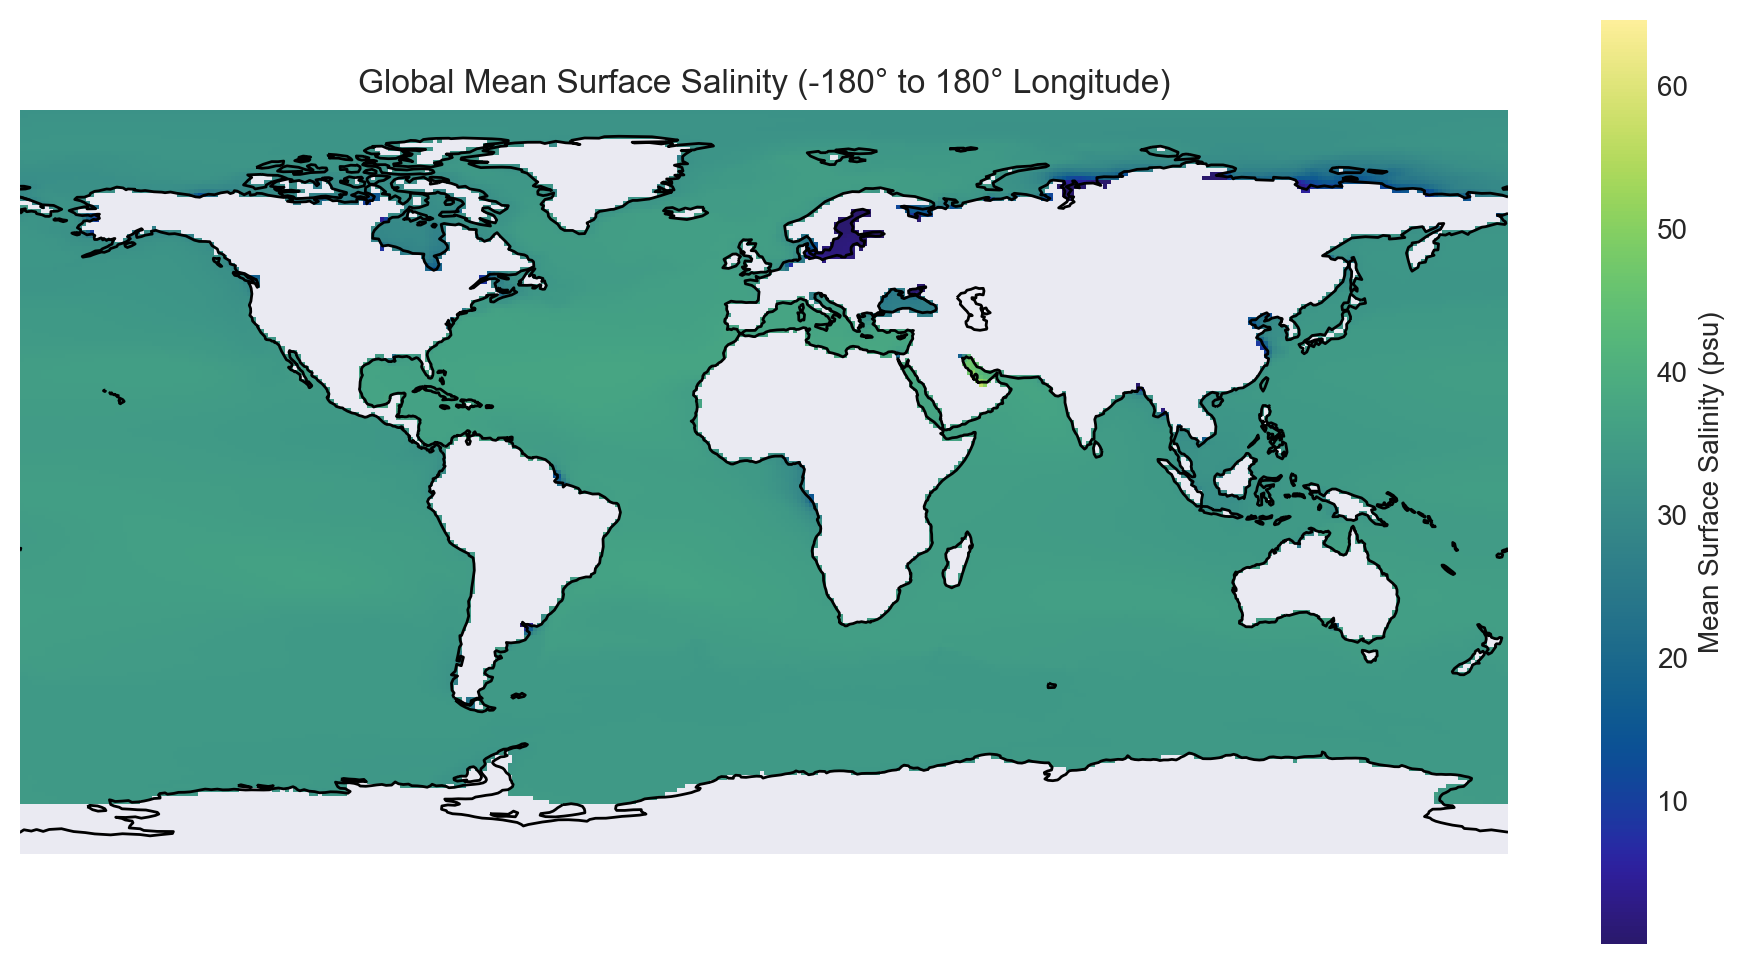

In [166]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 6))
surface_salinity.mean(dim="time").plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline,
    cbar_kwargs={"label": "Mean Surface Salinity (psu)"},
)
ax.coastlines()
ax.set_global()
ax.set_title("Global Mean Surface Salinity (-180° to 180° Longitude)")
plt.show()

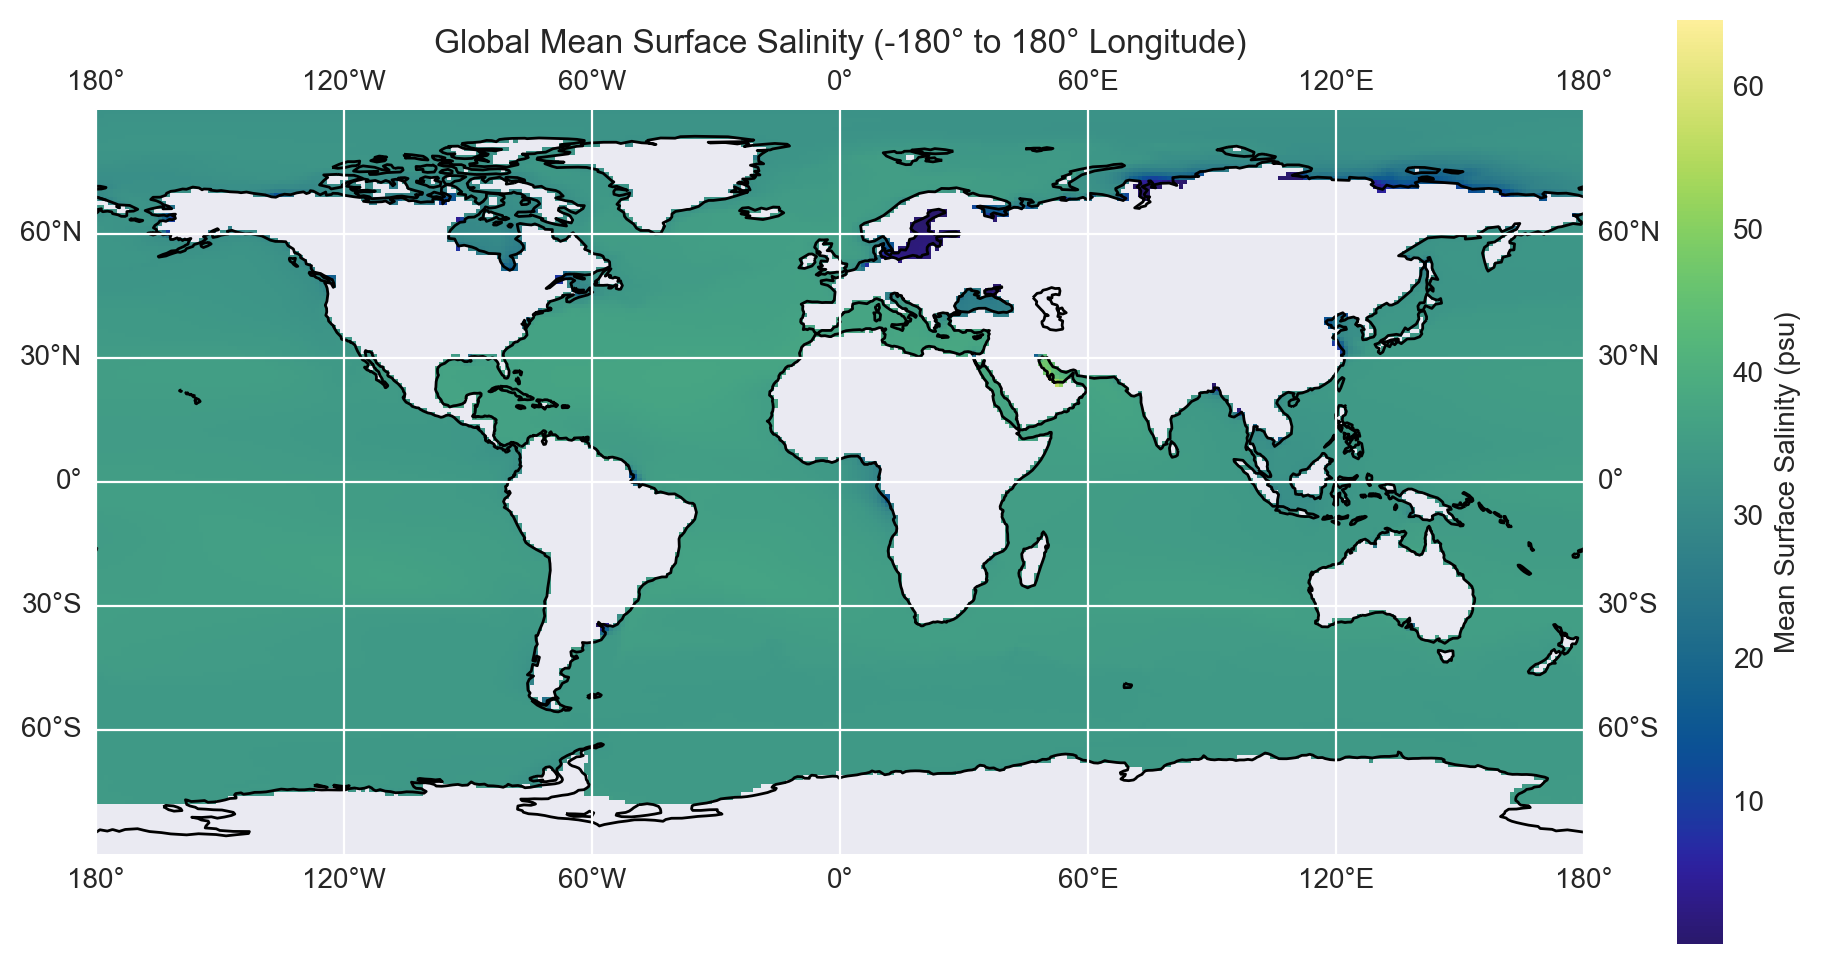

In [167]:
# Create the figure and axes with a PlateCarree projection
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 6))

# Plot the mean surface salinity
surface_salinity.mean(dim="time").plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline,
    cbar_kwargs={"label": "Mean Surface Salinity (psu)"},
)

# Add coastlines
ax.coastlines()

# Set global view
ax.set_global()

# Add gridlines with latitude and longitude labels
ax.gridlines(draw_labels=True)

# Set title
ax.set_title("Global Mean Surface Salinity (-180° to 180° Longitude)")

# Show the plot
plt.show()